# Generating SQL for SQLite using Ollama, ChromaDB
This notebook runs through the process of using the `vanna` Python package to generate SQL using AI (RAG + LLMs) including connecting to a database and training. If you're not ready to train on your own database, you can still try it using a sample [SQLite database](app.md).


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Which LLM do you want to use?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI via Vanna.AI (Recommended)</div>
        <small class="w-full">Use Vanna.AI for free to generate your queries</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-standard-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI</div>
        <small class="w-full">Use OpenAI with your own API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-azure-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Azure OpenAI</div>
        <small class="w-full">If you have OpenAI models deployed on Azure</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> Ollama</div>
        <small class="w-full">Use Ollama locally for free. Requires additional setup.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-mistral-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Mistral via Mistral API</div>
        <small class="w-full">If you have a Mistral API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-other-llm-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other LLM</div>
        <small class="w-full">If you have a different LLM model</small>
      </div>
    </a>
  </li>
    
</ul>
    


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Where do you want to store the 'training' data?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-ollama-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Vanna Hosted Vector DB (Recommended)</div>
        <small class="w-full">Use Vanna.AIs hosted vector database (pgvector) for free. This is usable across machines with no additional setup.</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> ChromaDB</div>
        <small class="w-full">Use ChromaDBs open-source vector database for free locally. No additional setup is necessary -- all database files will be created and stored locally.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-ollama-marqo/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Marqo</div>
        <small class="w-full">Use Marqo locally for free. Requires additional setup. Or use their hosted option.</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-ollama-other-vectordb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other VectorDB</div>
        <small class="w-full">Use any other vector database. Requires additional setup.</small>
      </div>
    </a>
  </li>
    
</ul>
    

## Setup

In [1]:
import sys
print("\n".join(sys.path))

/home/gongai/anaconda3/envs/vanna/lib/python311.zip
/home/gongai/anaconda3/envs/vanna/lib/python3.11
/home/gongai/anaconda3/envs/vanna/lib/python3.11/lib-dynload

/home/gongai/.local/lib/python3.11/site-packages
/home/gongai/anaconda3/envs/vanna/lib/python3.11/site-packages
/home/gongai/api_keys/apikeystore
/home/gongai/projects/wgong/ssadata/src


In [2]:
import warnings
import re

warnings.filterwarnings('ignore', category=DeprecationWarning, message='^Number of requested results')
# warnings.filterwarnings('ignore', category=DeprecationWarning, message=re.escape(r'^Some regex pattern'))

import os

import re
from time import time
from datetime import datetime 

from vanna.ollama import Ollama
from vanna.chromadb.chromadb_vector import ChromaDB_VectorStore

In [3]:
model_name = "qwen2.5-coder:14b"  #  "qwen2.5-coder"  # 'deepseek-coder-v2'
CONFIG = {
    'model': model_name,   # 'mistral' # "starcoder2"
    'options': {
        'gpu': True,
    }
}

file_db = "~/Downloads/datasets/chinook.db"

clean_and_train = True  # False  

sql_id = 1
NUM_RETRY = 3

allow_llm_to_see_data = True
# allow_llm_to_see_data (bool): Whether to allow the LLM to see the data (for the purposes of introspecting the data to generate the final SQL).

In [4]:
class MyVanna(ChromaDB_VectorStore, Ollama):
    def __init__(self, config=None):
        ChromaDB_VectorStore.__init__(self, config=config)
        Ollama.__init__(self, config=config)

def remove_collections(collection_name=None, ACCEPTED_TYPES = ["sql", "ddl", "documentation"]):
    if not collection_name:
        collections = ACCEPTED_TYPES
    elif isinstance(collection_name, str):
        collections = [collection_name]
    elif isinstance(collection_name, list):
        collections = collection_name
    else:
        print(f"\t{collection_name} is unknown: Skipped")
        return

    for c in collections:
        if not c in ACCEPTED_TYPES:
            print(f"\t{c} is unknown: Skipped")
            continue
            
        # print(f"vn.remove_collection('{c}')")
        vn.remove_collection(c)

def strip_brackets(ddl):
    """
    This function removes square brackets from table and column names in a DDL script.
    
    Args:
        ddl (str): The DDL script containing square brackets.
    
    Returns:
        str: The DDL script with square brackets removed.
    """
    # Use regular expressions to match and replace square brackets
    pattern = r"\[([^\]]+)]"  # Match any character except ] within square brackets
    return re.sub(pattern, r"\1", ddl)

def my_vn_ask(question, sql_id, allow_llm_to_see_data=False, num_retry=NUM_RETRY, separator=80*'='):
    # allow retry by appending error msg to question
    print(f"\n{separator}\n# QUESTION - {sql_id}:  {question}\n{separator}\n")
    sql, df, fig, err_msg = vn.ask(question=question, allow_llm_to_see_data=allow_llm_to_see_data)
    if not err_msg or ("[ERROR-SQL]" not in err_msg) and ("[ERROR-DB]" not in err_msg):
        return sql, df, fig, err_msg

    for i_retry in range(num_retry-1):
        msg = f"*** RETRY {i_retry+1} ***" 
        print(msg)
        question = f"""
        For the question {question}, 
        the generated SQL statement {sql} results in the following exception {err_msg} .
        Please fix the error and re-generate the SQL
        """
        
        sql, df, fig, err_msg = vn.ask(question=question, allow_llm_to_see_data=allow_llm_to_see_data)
        if not err_msg or ("[ERROR-SQL]" not in err_msg) and ("[ERROR-DB]" not in err_msg):
            break       

    return sql, df, fig, err_msg  

In [5]:
vn = MyVanna(config=CONFIG)

In [6]:
hostname = os.uname().nodename
print("Hostname:", hostname)

Hostname: ducklover1


In [7]:
file_db = os.path.abspath(os.path.expanduser(file_db))
vn.connect_to_sqlite(file_db)

In [8]:
vn.run_sql_is_set

True

In [9]:
if clean_and_train:
    remove_collections()

## Training

### [SQLite sample database](https://www.sqlitetutorial.net/sqlite-sample-database/)

You only need to train once. Do not train again unless you want to add more training data.

In [10]:
df_ddl = vn.run_sql("SELECT type, sql FROM sqlite_master WHERE sql is not null")

In [11]:
df_ddl

,type,sql
0,table,"CREATE TABLE ""albums""\r\n(\r\n [AlbumId] IN..."
1,table,"CREATE TABLE sqlite_sequence(name,seq)"
2,table,"CREATE TABLE ""artists""\r\n(\r\n [ArtistId] ..."
3,table,"CREATE TABLE ""customers""\r\n(\r\n [Customer..."
4,table,"CREATE TABLE ""employees""\r\n(\r\n [Employee..."
5,table,"CREATE TABLE ""genres""\r\n(\r\n [GenreId] IN..."
6,table,"CREATE TABLE ""invoices""\r\n(\r\n [InvoiceId..."
7,table,"CREATE TABLE ""invoice_items""\r\n(\r\n [Invo..."
8,table,"CREATE TABLE ""media_types""\r\n(\r\n [MediaT..."
9,table,"CREATE TABLE ""playlists""\r\n(\r\n [Playlist..."


In [12]:
if clean_and_train:
    for ddl in df_ddl['sql'].to_list():
        ddl = strip_brackets(ddl)
        vn.train(ddl=ddl)

    # Sometimes you may want to add documentation about your business terminology or definitions.
    vn.train(documentation="In the chinook database invoice means order")

    doc_str = """
    In the 'customers' table, address column names do not have 'Billing' prefix, 
    e.g. country column name is 'country', not 'BillingCountry'
    """
    vn.train(documentation=doc_str)


Adding ddl: CREATE TABLE "albums"
(
    AlbumId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    Title NVARCHAR(160)  NOT NULL,
    ArtistId INTEGER  NOT NULL,
    FOREIGN KEY (ArtistId) REFERENCES "artists" (ArtistId) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl: CREATE TABLE sqlite_sequence(name,seq)
Adding ddl: CREATE TABLE "artists"
(
    ArtistId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    Name NVARCHAR(120)
)
Adding ddl: CREATE TABLE "customers"
(
    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    FirstName NVARCHAR(40)  NOT NULL,
    LastName NVARCHAR(20)  NOT NULL,
    Company NVARCHAR(80),
    Address NVARCHAR(70),
    City NVARCHAR(40),
    State NVARCHAR(40),
    Country NVARCHAR(40),
    PostalCode NVARCHAR(10),
    Phone NVARCHAR(24),
    Fax NVARCHAR(24),
    Email NVARCHAR(60)  NOT NULL,
    SupportRepId INTEGER,
    FOREIGN KEY (SupportRepId) REFERENCES "employees" (EmployeeId) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl: CREATE TAB

In [13]:
# show training data
training_data = vn.get_training_data()
training_data

,id,question,content,training_data_type
0,039f9d54-59f7-5f29-8c04-14dbc3e95671-ddl,None,"CREATE TABLE ""artists""\r\n(\r\n ArtistId IN...",ddl
1,0db84e3d-ef41-563c-803e-21c1b985dc19-ddl,None,"CREATE TABLE ""invoices""\r\n(\r\n InvoiceId ...",ddl
2,10cba811-ddba-5042-9e90-d764dfcd1629-ddl,None,"CREATE INDEX IFK_InvoiceCustomerId ON ""invoice...",ddl
3,2c711317-b93d-5f60-a728-cb1c6fcbc040-ddl,None,"CREATE INDEX IFK_CustomerSupportRepId ON ""cust...",ddl
4,37319c81-65f7-50ee-956b-795de244bee5-ddl,None,"CREATE TABLE sqlite_stat1(tbl,idx,stat)",ddl
5,40bd77cd-e1de-5872-8693-624117ff413c-ddl,None,"CREATE INDEX IFK_InvoiceLineInvoiceId ON ""invo...",ddl
6,41130543-7164-562a-90a7-0fd0a409c154-ddl,None,"CREATE TABLE ""albums""\r\n(\r\n AlbumId INTE...",ddl
7,458debc8-8082-5450-a17a-66028bd55ace-ddl,None,"CREATE TABLE ""playlists""\r\n(\r\n PlaylistI...",ddl
8,4815f3fd-925b-53ce-9dfa-0e4285d5abd3-ddl,None,"CREATE TABLE ""invoice_items""\r\n(\r\n Invoi...",ddl
9,48d484e9-984c-58ff-b391-75521c69d486-ddl,None,"CREATE INDEX IFK_PlaylistTrackTrackId ON ""play...",ddl


```sql

SELECT name FROM sqlite_master WHERE type = 'table';

```

```sql

SELECT c.CustomerId, SUM(il.Quantity) AS TotalAlbums
FROM Customers c
JOIN invoices i  ON c.CustomerId = i.CustomerId
JOIN invoice_items il ON i.InvoiceId = il.InvoiceId
GROUP BY c.CustomerId
ORDER BY TotalAlbums DESC
LIMIT 5

```


## Ask AI
Whenever you ask a new question, it will find the 10 most relevant pieces of training data and use it as part of the LLM prompt to generate the SQL.

### warm-up





# QUESTION :  How many customers are there



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT COUNT(CustomerId) FROM customers;


[( <SQL> )]
generated SQL statement



SELECT COUNT(CustomerId) FROM customers;


[( <DataFrame> )]
queried dataframe



,COUNT(CustomerId)
0,59



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

# Assuming df is your DataFrame
value = df.iloc[0]['COUNT(CustomerId)']

fig = go.Figure(go.Indicator(
    mode="number",
    value=value,
    title={"text": "Number of Customers"}
))

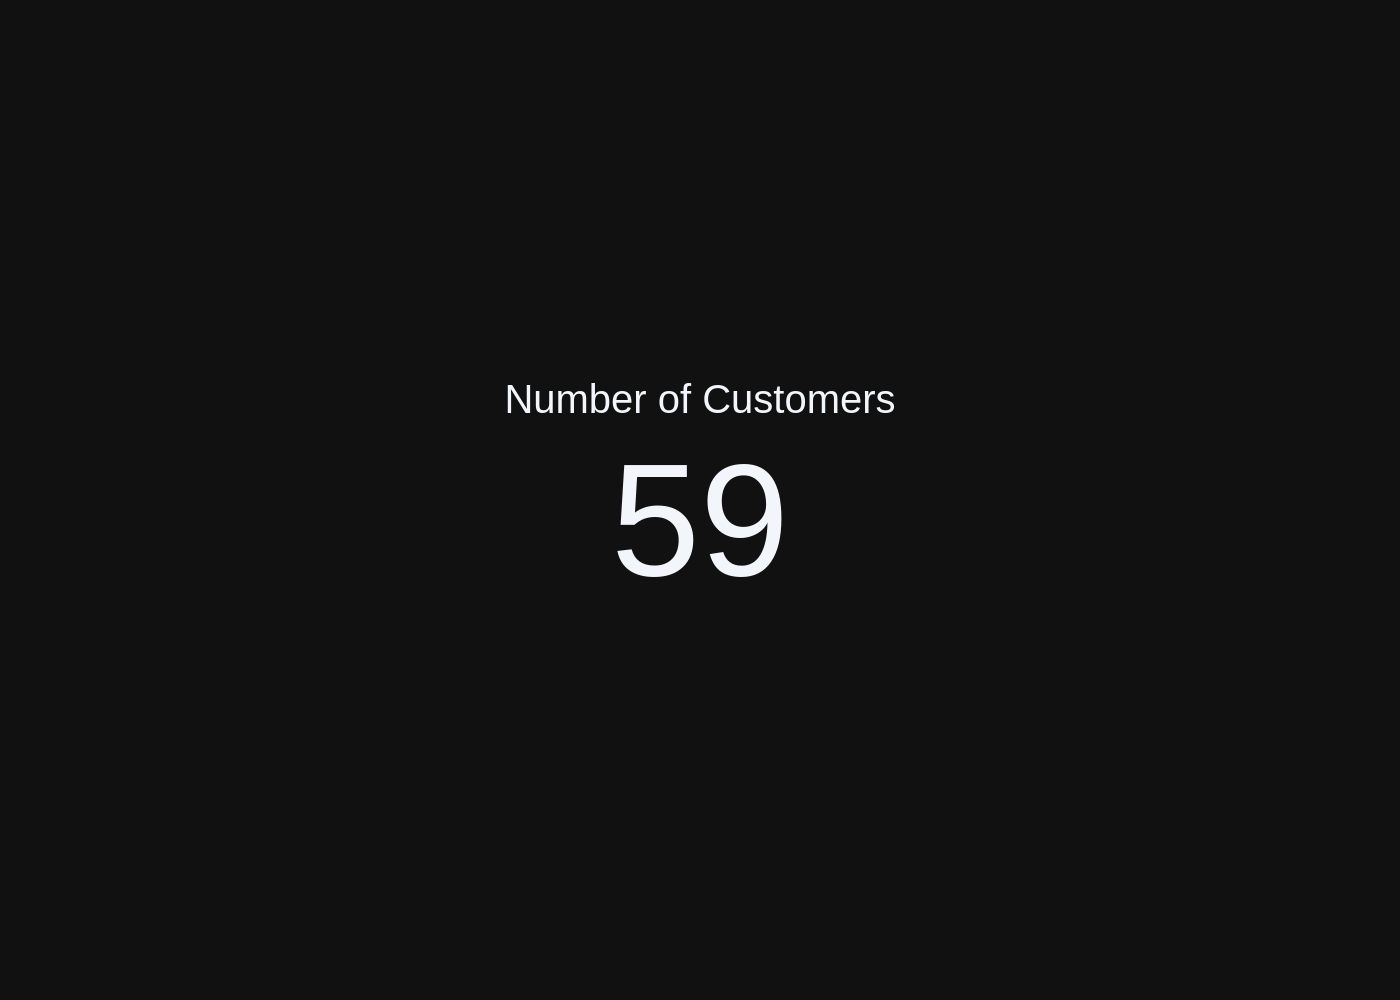

elapsed_time = 14.813005685806274


In [14]:
ts_start = time()
question = "How many customers are there"
resp = vn.ask_adaptive(question=question)
ts_stop = time()
elapsed_time = ts_stop - ts_start
print(f"elapsed_time = {elapsed_time}")

### Loop over questions

In [15]:
questions = [
    "Can you list all tables in the SQLite database catalog?",
    "which table stores customer's orders",
    "How many customers are there",
    "what are the top 5 countries that customers come from?",
    "List all albums and their corresponding artist names  ",
    """Find all tracks with a name containing "What" (case-insensitive) """,
    "Get the total number of invoices for each customer",
    "Find the total number of invoices per country",
    "List all invoices with a total exceeding $10",
    "Find all invoices since 2010 and the total amount invoiced:",
    "List all employees and their reporting manager's name (if any):",
    " Get the average invoice total for each customer:",
    "Find the top 5 most expensive tracks (based on unit price):",
    "List all genres and the number of tracks in each genre:",
    "Get all genres that do not have any tracks associated with them:",
    "List all customers who have not placed any orders:",
    """ 
        Can you find the top 10 most popular artists based on the number of tracks?
        Hint: There are 3 tables - artists, albums and tracks, 
        where albums and artists are linked by ArtistId, albums and tracks are linked by AlbumId,
    """,
    "List all customers from Canada and their email addresses:",
    "Find the customer with the most invoices ",
    "Find the customer who bought the most albums in total quantity (across all invoices):",
    """      
        Find the top 5 customers who bought the most albums in total quantity (across all invoices):
        Hint: album quantity is found in invoice_items, 
    """,
    """  
         Find the top 5 customers who spent the most money overall,  
         Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary 
    """,
    "Get all playlists containing at least 10 tracks and the total duration of those tracks:",
    "Identify artists who have albums with tracks appearing in multiple genres:",
]





# QUESTION  - 2:  Can you list all tables in the SQLite database catalog?



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT name FROM sqlite_master WHERE type='table';


[( <SQL> )]
generated SQL statement



SELECT name FROM sqlite_master WHERE type='table';


[( <DataFrame> )]
queried dataframe



,name
0,albums
1,sqlite_sequence
2,artists
3,customers
4,employees
5,genres
6,invoices
7,invoice_items
8,media_types
9,playlists



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if len(df) == 1:
    fig = px.indicator(
        mode="number",
        value=df.iloc[0]['name'],
        title="Single Table in Database"
    )
else:
    fig = px.bar(
        df,
        x='name',
        y=range(len(df)),
        labels={'x': 'Table Name', 'y': 'Index'},
        title="Tables in SQLite Database Catalog"
    )

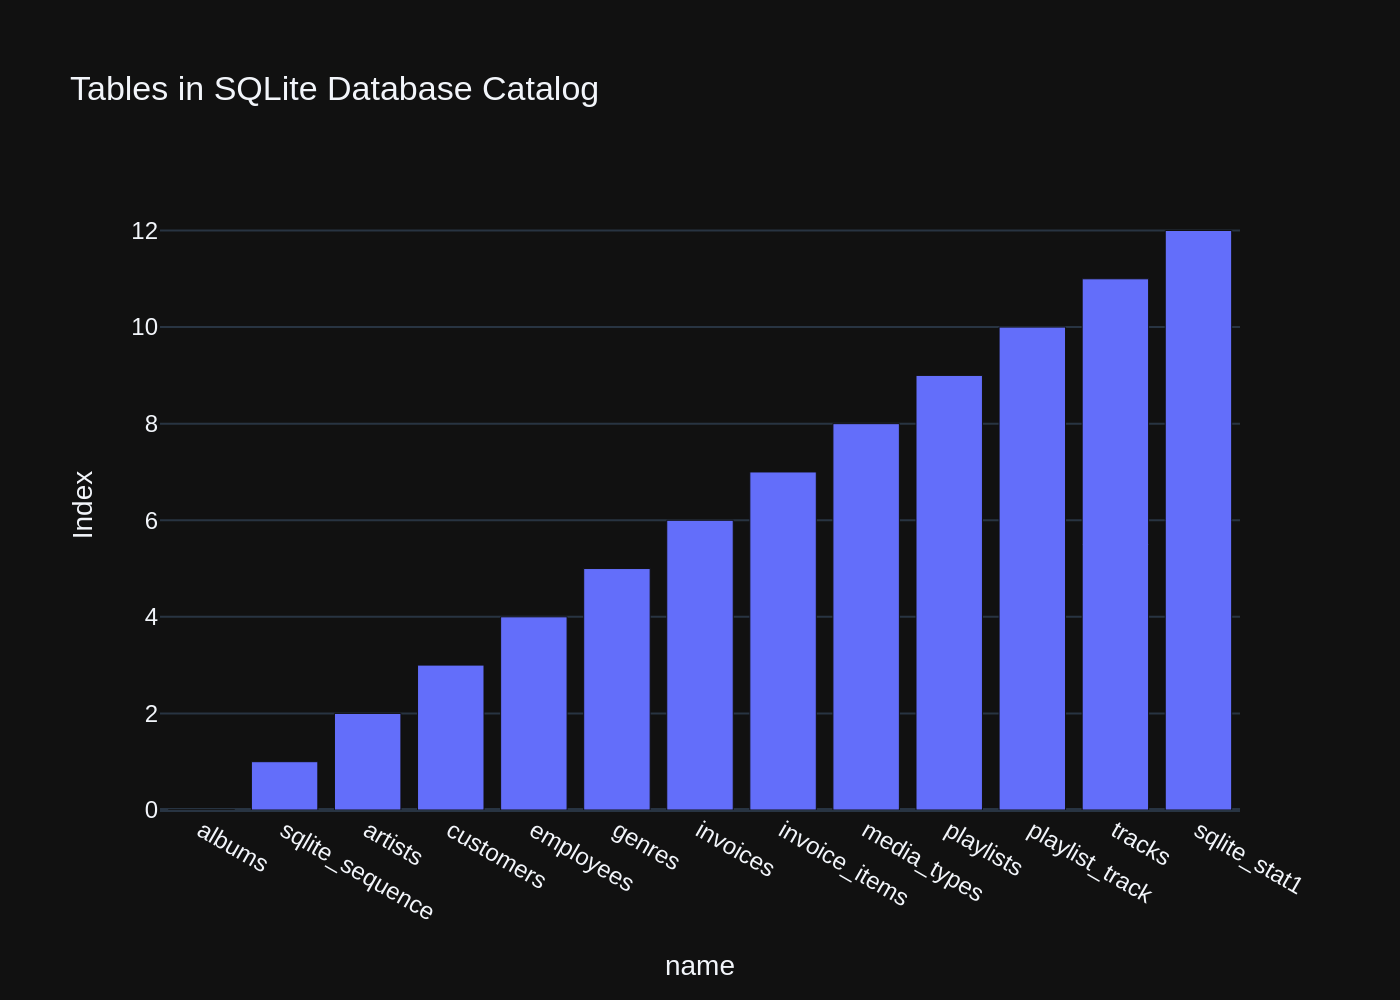





# QUESTION  - 3:  which table stores customer's orders



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( RETRY )]
***** 1 *****


Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT * FROM invoices LIMIT 20


[( <DataFrame> )]
queried dataframe



,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2009-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86
5,6,37,2009-01-19 00:00:00,Berger Straße 10,Frankfurt,None,Germany,60316,0.99
6,7,38,2009-02-01 00:00:00,Barbarossastraße 19,Berlin,None,Germany,10779,1.98
7,8,40,2009-02-01 00:00:00,"8, Rue Hanovre",Paris,None,France,75002,1.98
8,9,42,2009-02-02 00:00:00,"9, Place Louis Barthou",Bordeaux,None,France,33000,3.96
9,10,46,2009-02-03 00:00:00,3 Chatham Street,Dublin,Dublin,Ireland,None,5.94



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

# Check if the DataFrame has more than one unique value to decide on the chart type
unique_values = df['Total'].nunique()
if unique_values > 1:
    fig = px.bar(df, x='InvoiceId', y='Total', title='Customer Orders Total')
else:
    fig = px.indicator(value=df['Total'].iloc[0], title='Customer Order Total')

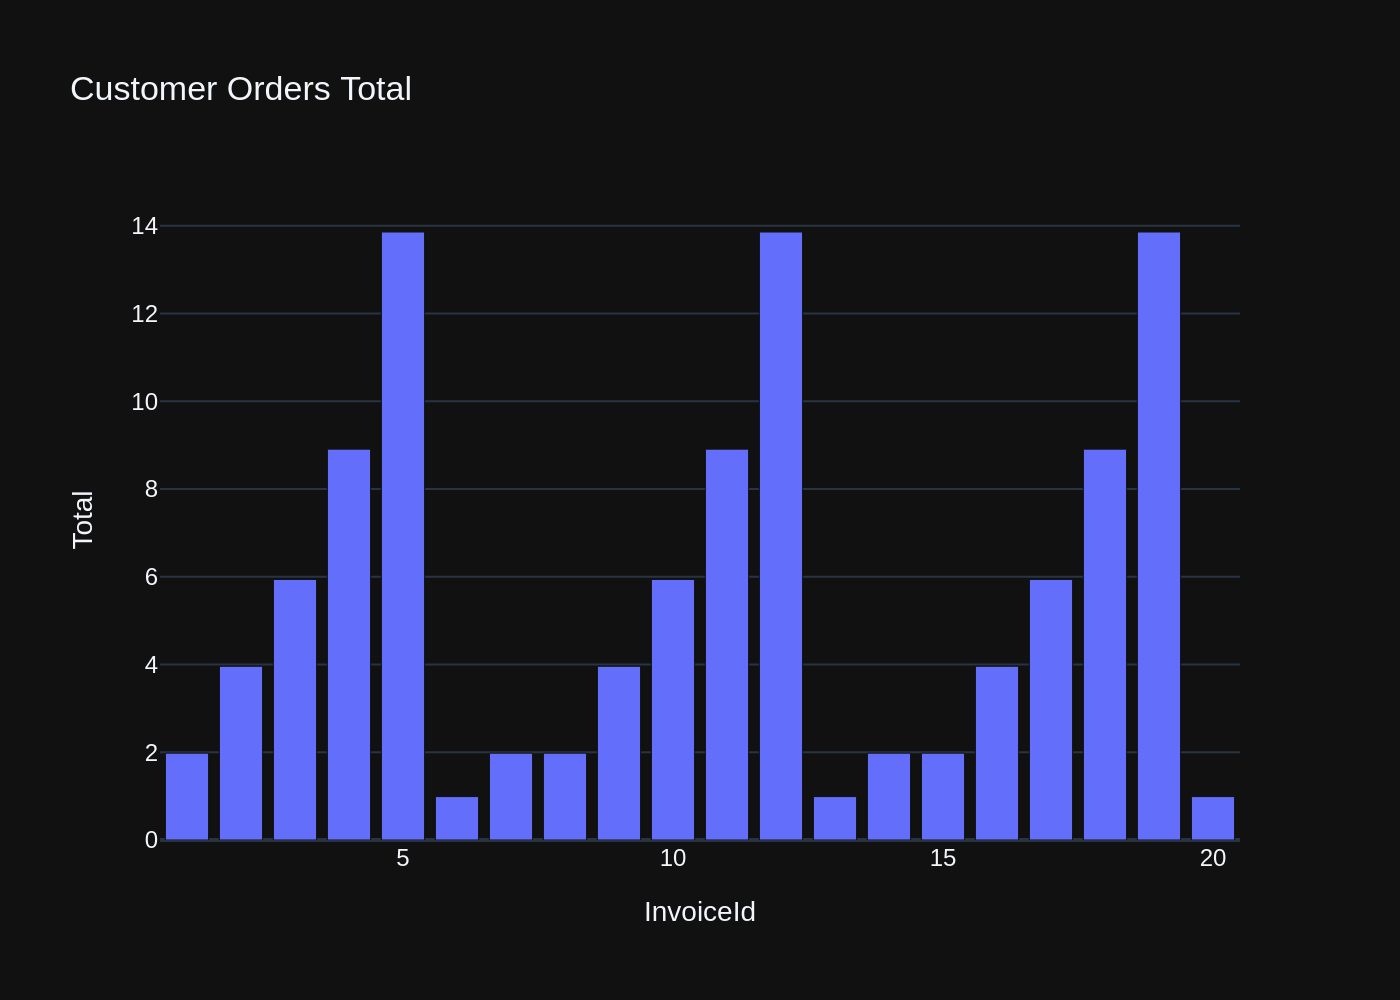





# QUESTION  - 4:  How many customers are there



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT COUNT(CustomerId) FROM customers;


[( <SQL> )]
generated SQL statement



SELECT COUNT(CustomerId) FROM customers;


[( <DataFrame> )]
queried dataframe



,COUNT(CustomerId)
0,59



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

if len(df) == 1:
    fig = go.Figure(go.Indicator(
        mode="number",
        value=df['COUNT(CustomerId)'][0],
        title={"text": "Number of Customers"}
    ))
else:
    fig = go.Figure(data=[go.Bar(x=df.index, y=df['COUNT(CustomerId)'])])
    fig.update_layout(title='Number of Customers')

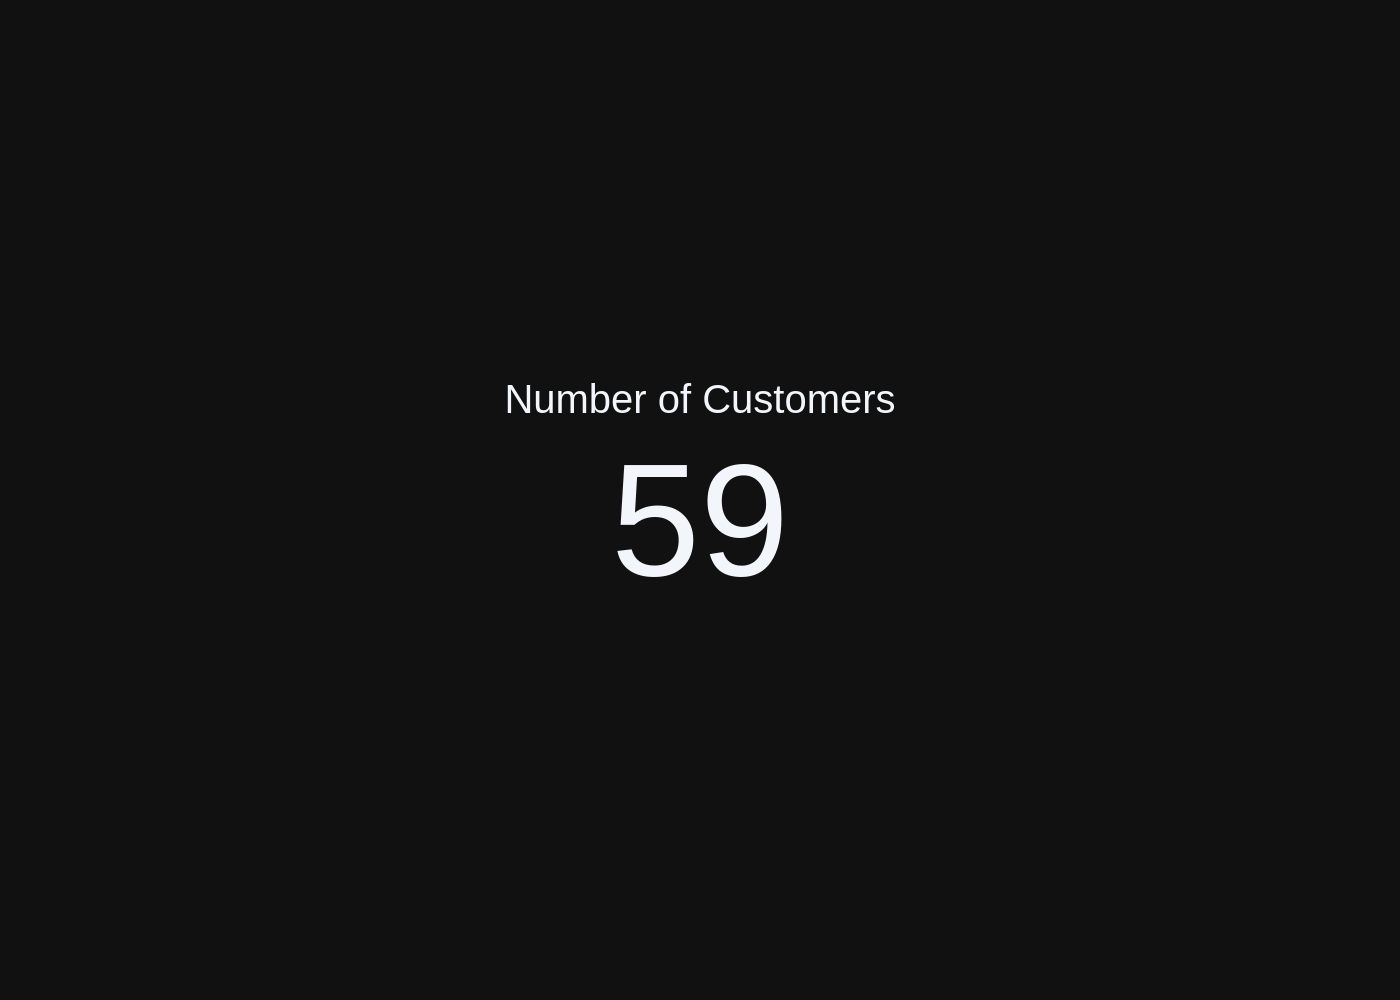





# QUESTION  - 5:  what are the top 5 countries that customers come from?



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT Country, COUNT(CustomerId) AS CustomerCount 
FROM customers 
GROUP BY Country 
ORDER BY CustomerCount DESC 
LIMIT 5;


[( <SQL> )]
generated SQL statement



SELECT Country, COUNT(CustomerId) AS CustomerCount 
FROM customers 
GROUP BY Country 
ORDER BY CustomerCount DESC 
LIMIT 5;


[( <DataFrame> )]
queried dataframe



,Country,CustomerCount
0,USA,13
1,Canada,8
2,France,5
3,Brazil,5
4,Germany,4



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

if len(df) == 1:
    fig = go.Figure(go.Indicator(
        mode="number",
        value=df['CustomerCount'].iloc[0],
        title={"text": f"Number of Customers from {df['Country'].iloc[0]}"}
    ))
else:
    fig = go.Figure(data=[
        go.Bar(x=df['Country'], y=df['CustomerCount'])
    ])

fig.update_layout(
    title='Top 5 Countries by Number of Customers',
    xaxis_title='Country',
    yaxis_title='Number of Customers'
)

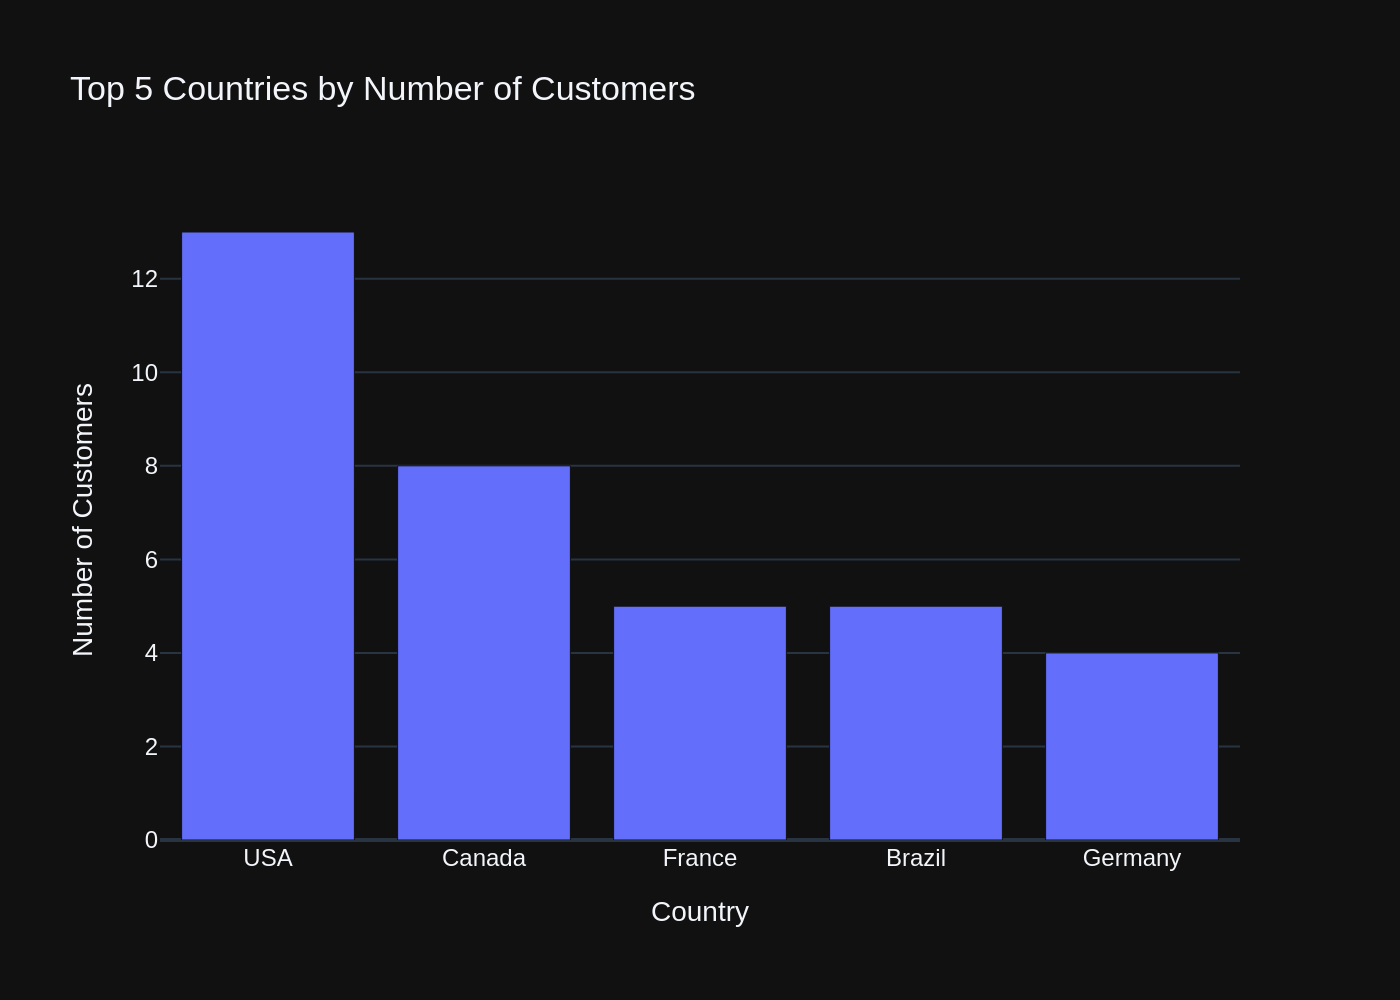





# QUESTION  - 6:  List all albums and their corresponding artist names  



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT T1.Title, T2.Name FROM albums AS T1 INNER JOIN artists AS T2 ON T1.ArtistId = T2.ArtistId LIMIT 20


[( <DataFrame> )]
queried dataframe



,Title,Name
0,For Those About To Rock We Salute You,AC/DC
1,Balls to the Wall,Accept
2,Restless and Wild,Accept
3,Let There Be Rock,AC/DC
4,Big Ones,Aerosmith
5,Jagged Little Pill,Alanis Morissette
6,Facelift,Alice In Chains
7,Warner 25 Anos,Antônio Carlos Jobim
8,Plays Metallica By Four Cellos,Apocalyptica
9,Audioslave,Audioslave



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if len(df) == 1:
    fig = px.indicator(
        mode="number",
        value=df['Title'].values[0],
        title=f"Album: {df['Name'].values[0]}"
    )
else:
    fig = px.bar(
        df,
        x='Title',
        y=df.index,
        orientation='h',
        labels={'y': 'Index', 'x': 'Album Title'},
        title='Albums by Artist'
    )

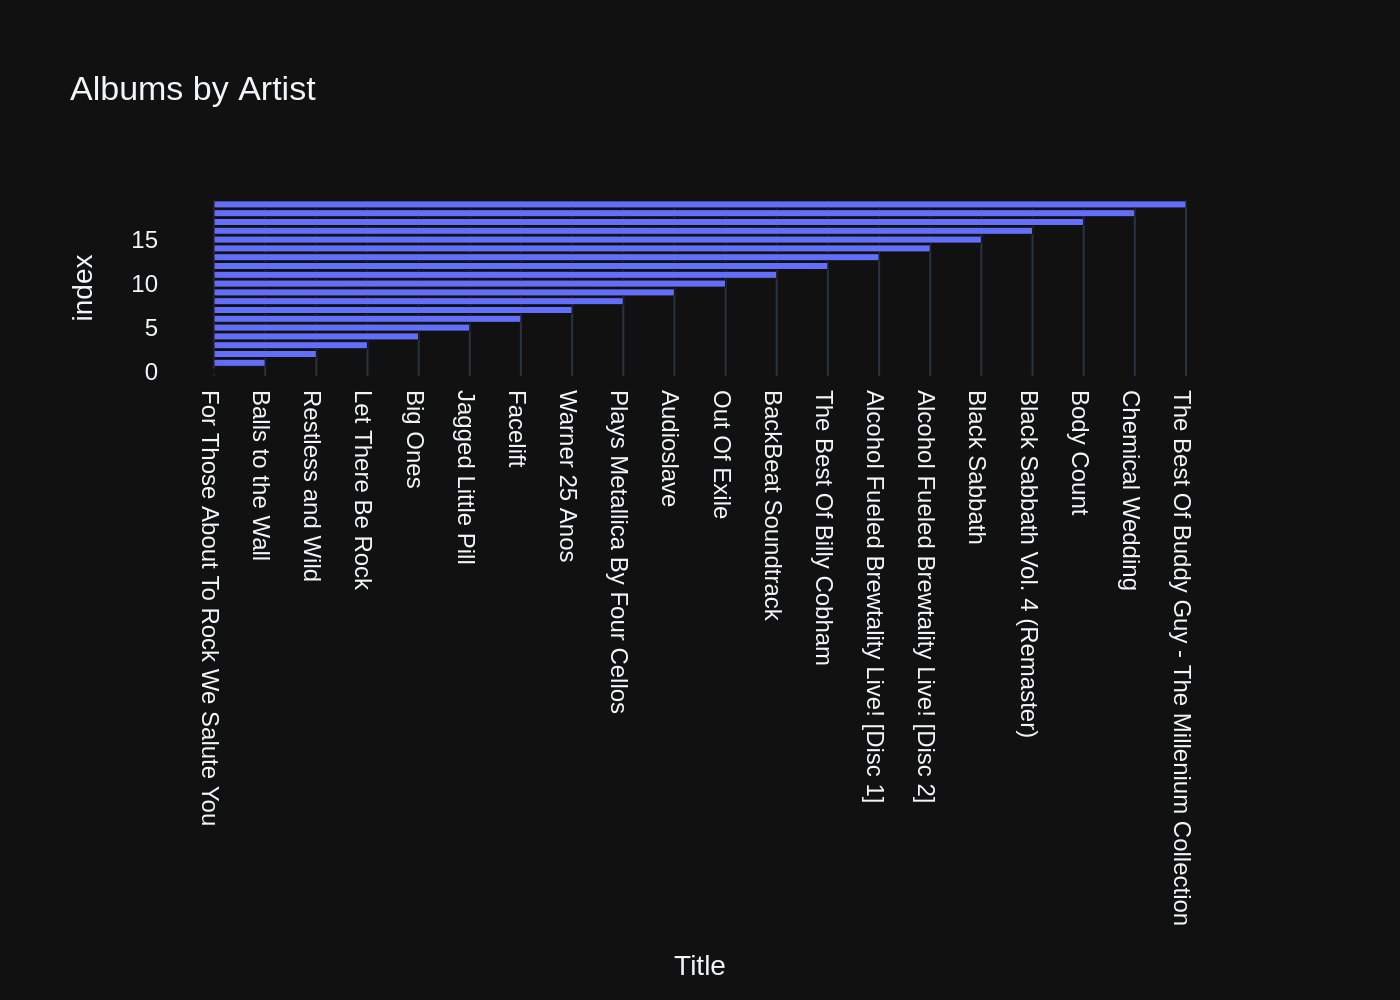





# QUESTION  - 7:  Find all tracks with a name containing "What" (case-insensitive) 



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT Name FROM tracks WHERE Name LIKE "%What%" LIMIT 20


[( <DataFrame> )]
queried dataframe



,Name
0,What It Takes
1,What You Are
2,Do what cha wanna
3,What is and Should Never Be
4,So What
5,What A Day
6,What If I Do?
7,What Now My Love
8,Whatsername
9,"Whatever It Is, I Just Can't Stop"



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

# Check if the DataFrame has more than one entry
if len(df) > 1:
    fig = go.Figure(data=[go.Table(
        header=dict(values=['Track Name']),
        cells=dict(values=[df['Name']])
    )])
else:
    fig = go.Figure(go.Indicator(
        mode="number",
        value=df.iloc[0]['Name'],
        title="Track Name"
    ))

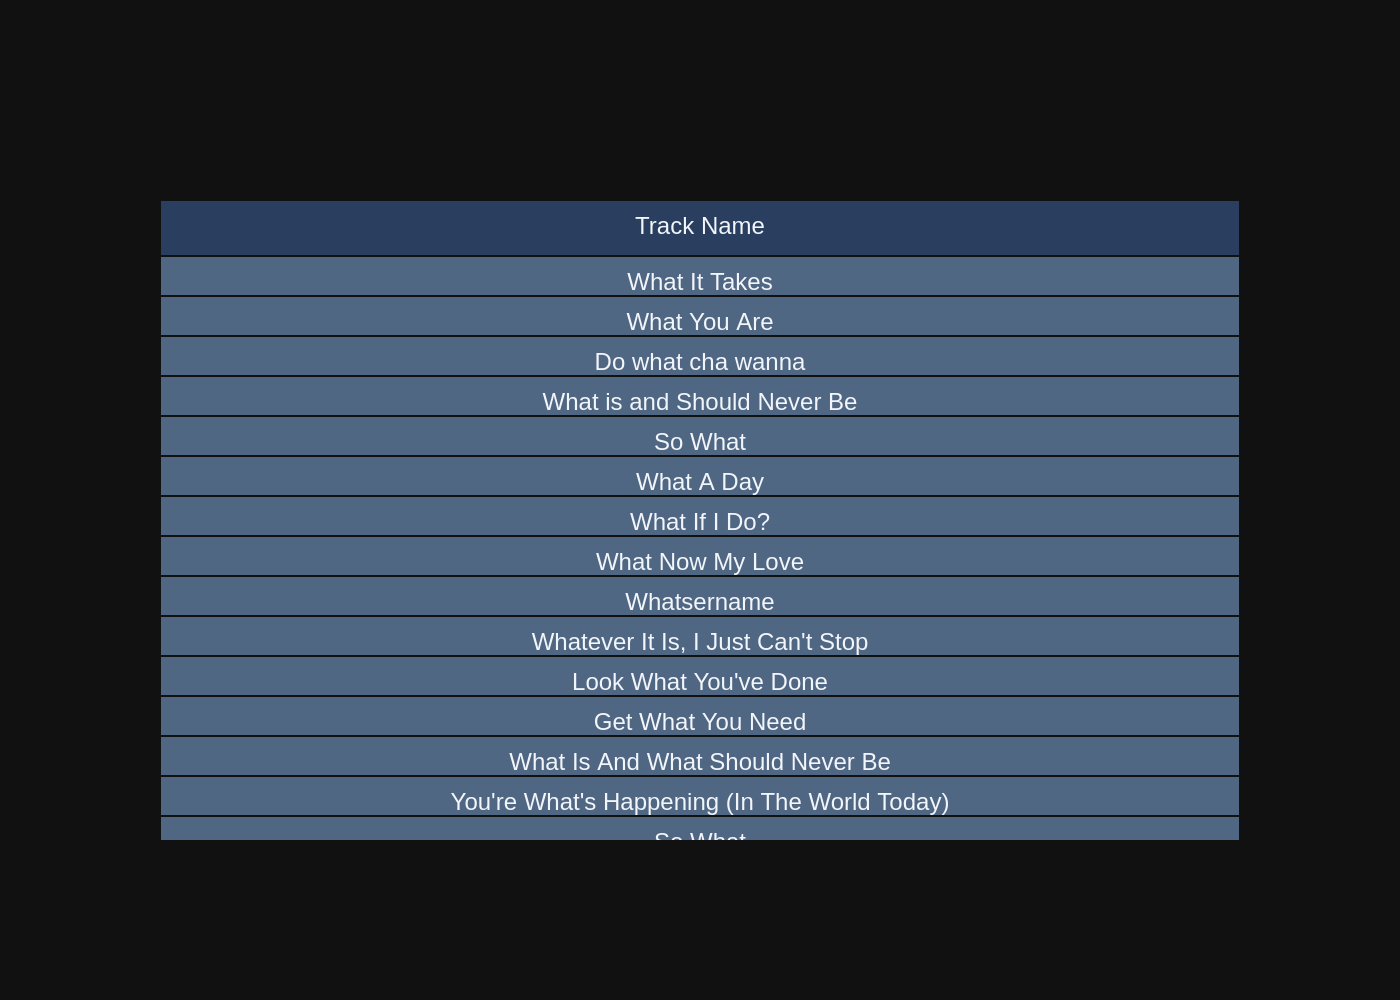





# QUESTION  - 8:  Get the total number of invoices for each customer



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT CustomerId, COUNT(InvoiceId) AS TotalInvoices 
FROM invoices 
GROUP BY CustomerId;


[( <SQL> )]
generated SQL statement



SELECT CustomerId, COUNT(InvoiceId) AS TotalInvoices 
FROM invoices 
GROUP BY CustomerId;


[( <DataFrame> )]
queried dataframe



,CustomerId,TotalInvoices
0,1,7
1,2,7
2,3,7
3,4,7
4,5,7
5,6,7
6,7,7
7,8,7
8,9,7
9,10,7



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

if len(df) == 1:
    fig = go.Figure(go.Indicator(
        mode="number",
        value=df['TotalInvoices'].iloc[0],
        title={"text": f"Total Invoices for Customer ID {df['CustomerId'].iloc[0]}"}
    ))
else:
    fig = go.Figure(data=[go.Bar(x=df['CustomerId'], y=df['TotalInvoices'])])
    fig.update_layout(title='Total Number of Invoices per Customer')

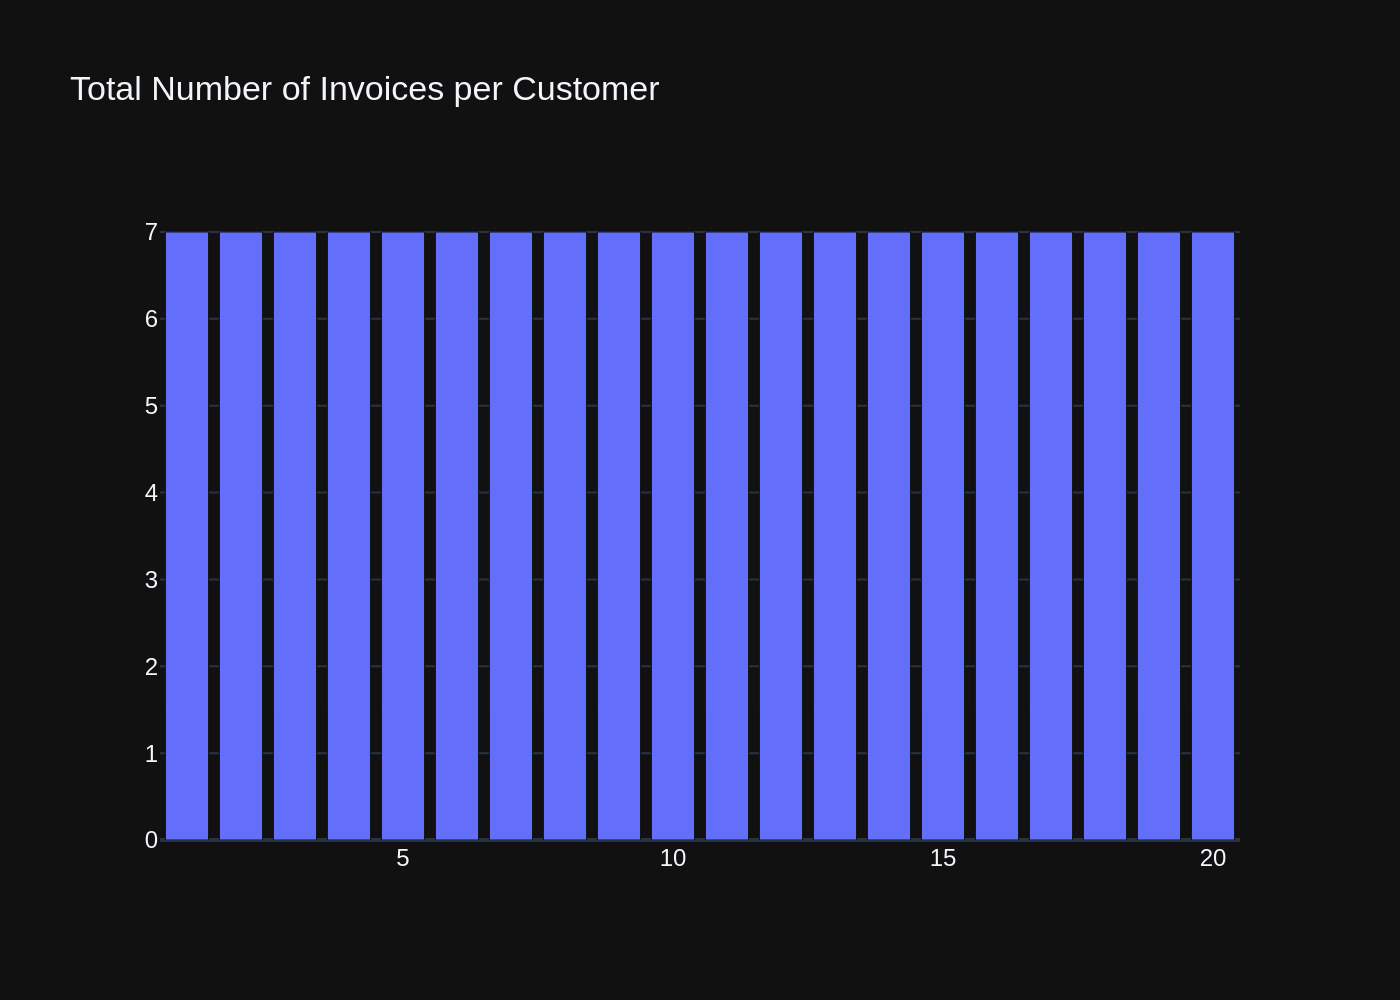





# QUESTION  - 9:  Find the total number of invoices per country



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT BillingCountry , COUNT(*) FROM invoices GROUP BY BillingCountry ORDER BY COUNT(*) DESC LIMIT 10;


[( <SQL> )]
generated SQL statement



SELECT BillingCountry , COUNT(*) FROM invoices GROUP BY BillingCountry ORDER BY COUNT(*) DESC LIMIT 10;


[( <DataFrame> )]
queried dataframe



,BillingCountry,COUNT(*)
0,USA,91
1,Canada,56
2,France,35
3,Brazil,35
4,Germany,28
5,United Kingdom,21
6,Portugal,14
7,Czech Republic,14
8,India,13
9,Sweden,7



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

if len(df) > 1:
    fig = go.Figure(data=go.Bar(x=df['BillingCountry'], y=df['COUNT(*)']))
else:
    fig = go.Figure(go.Indicator(
        mode="number",
        value=df.iloc[0]['COUNT(*)'],
        title={"text": f"Invoices in {df.iloc[0]['BillingCountry']}"}
    ))

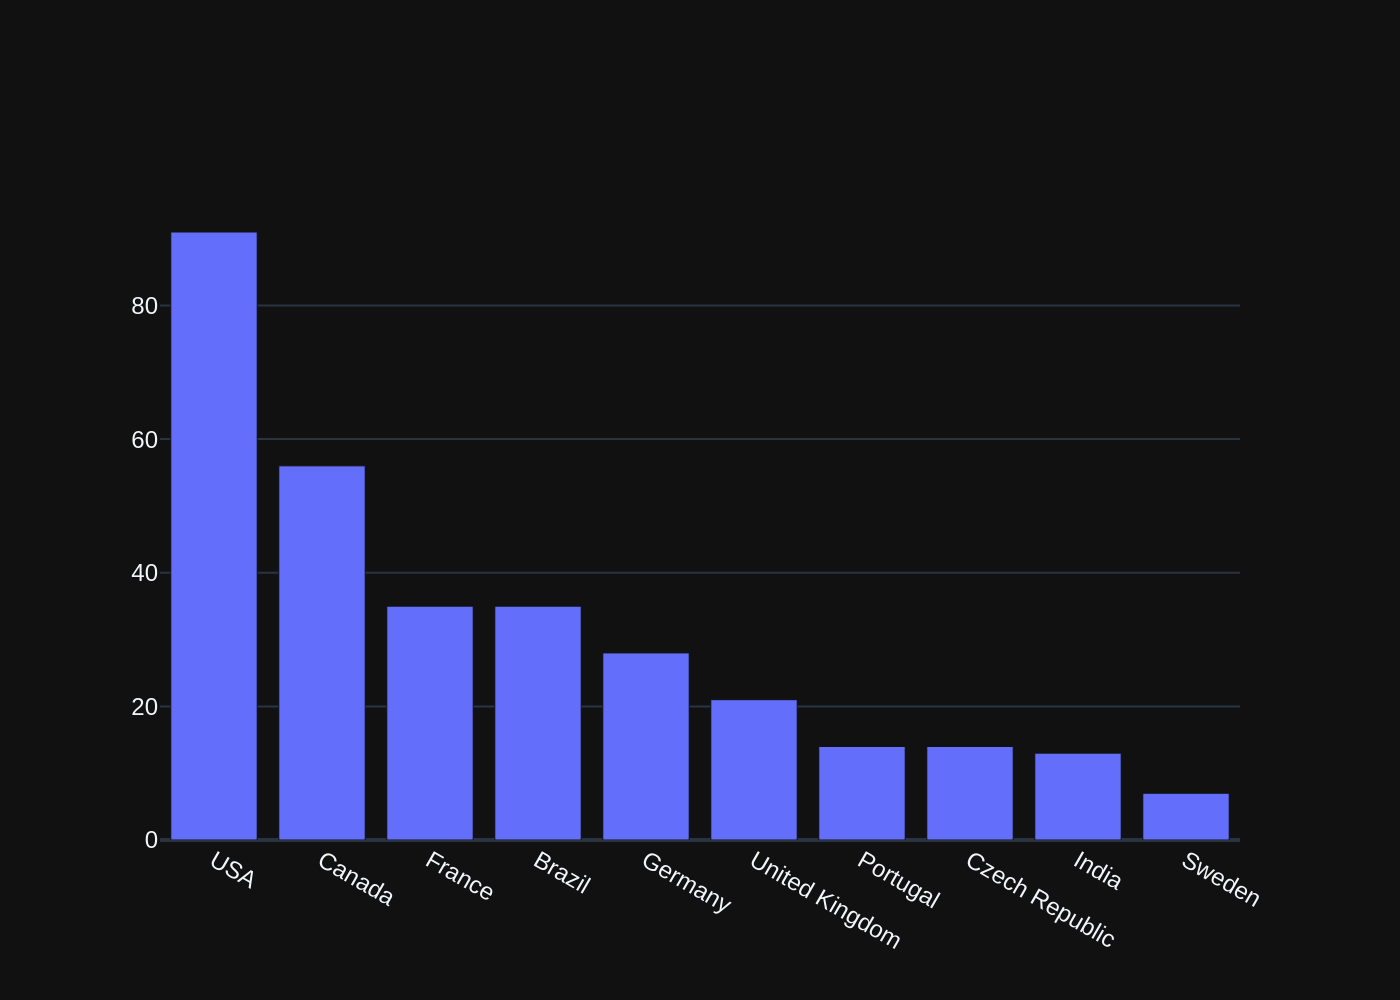





# QUESTION  - 10:  List all invoices with a total exceeding $10



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT * FROM invoices WHERE Total > 10 LIMIT 20


[( <DataFrame> )]
queried dataframe



,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86
1,12,2,2009-02-11 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,13.86
2,19,40,2009-03-14 00:00:00,"8, Rue Hanovre",Paris,None,France,75002,13.86
3,26,19,2009-04-14 00:00:00,1 Infinite Loop,Cupertino,CA,USA,95014,13.86
4,33,57,2009-05-15 00:00:00,"Calle Lira, 198",Santiago,None,Chile,None,13.86
5,40,36,2009-06-15 00:00:00,Tauentzienstraße 8,Berlin,None,Germany,10789,13.86
6,47,15,2009-07-16 00:00:00,700 W Pender Street,Vancouver,BC,Canada,V6C 1G8,13.86
7,54,53,2009-08-16 00:00:00,113 Lupus St,London,None,United Kingdom,SW1V 3EN,13.86
8,61,32,2009-09-16 00:00:00,696 Osborne Street,Winnipeg,MB,Canada,R3L 2B9,13.86
9,68,11,2009-10-17 00:00:00,"Av. Paulista, 2022",São Paulo,SP,Brazil,01310-200,13.86



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

if len(df) > 1:
    fig = go.Figure(data=[go.Scatter(x=df['InvoiceDate'], y=df['Total'])])
else:
    fig = go.Figure(data=[go.Indicator(value=df['Total'].values[0])])

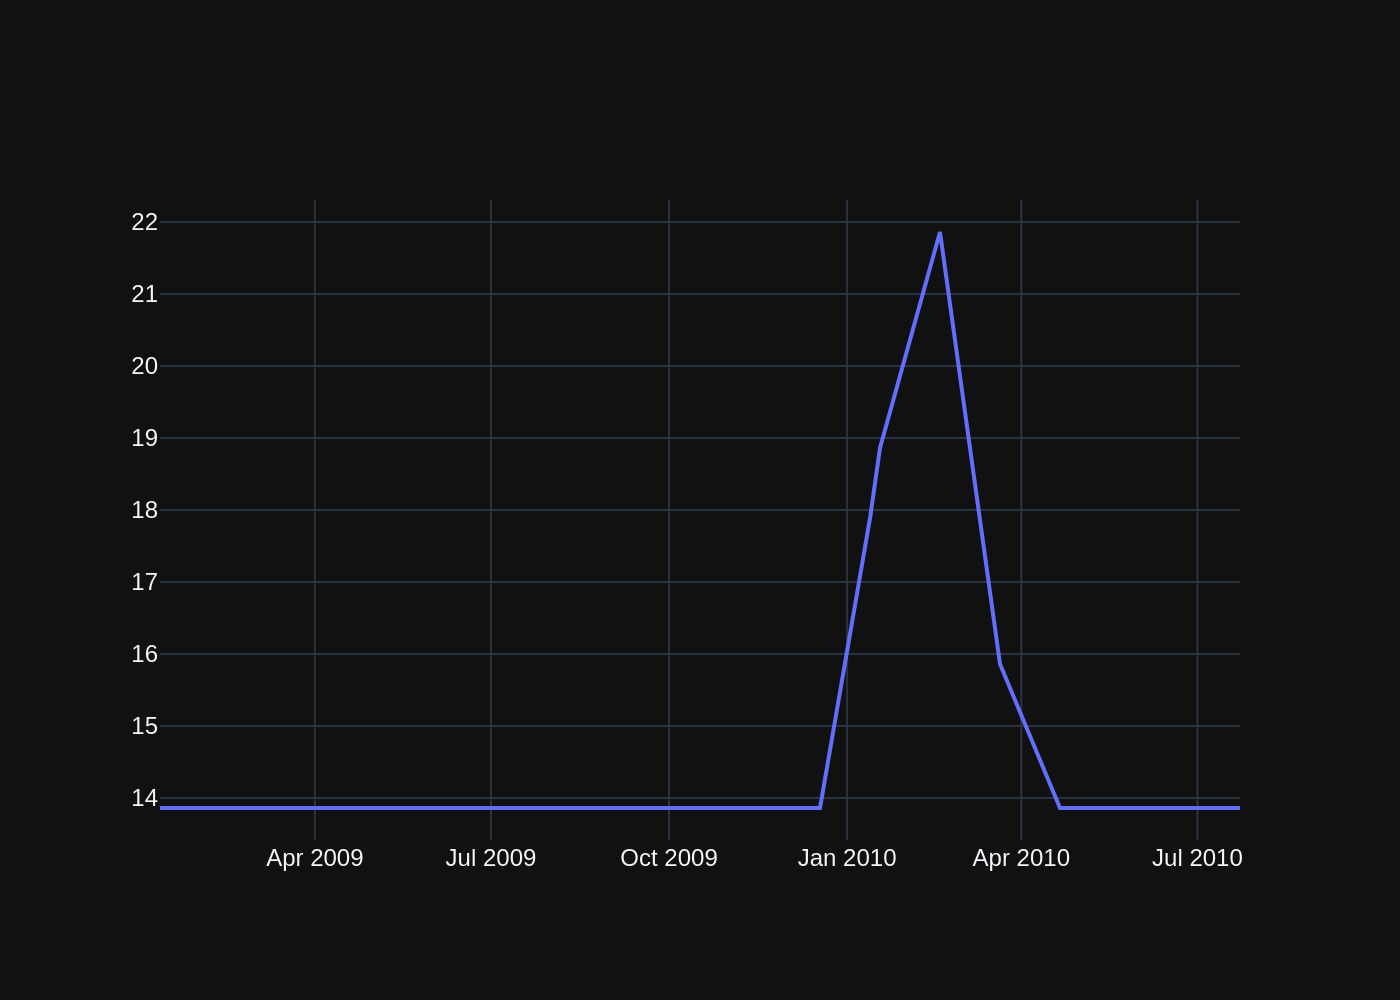





# QUESTION  - 11:  Find all invoices since 2010 and the total amount invoiced:



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT COUNT(*) , SUM(Total) FROM invoices WHERE STRFTIME('%Y', InvoiceDate) >= '2010';


[( <SQL> )]
generated SQL statement



SELECT COUNT(*) , SUM(Total) FROM invoices WHERE STRFTIME('%Y', InvoiceDate) >= '2010';


[( <DataFrame> )]
queried dataframe



,COUNT(*),SUM(Total)
0,329,1879.14



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

# Assuming df has two columns: COUNT(*) and SUM(Total)
if len(df) == 1:
    fig = px.indicator(
        mode="number",
        value=df.iloc[0]['SUM(Total)'],
        title={'text': "Total Invoiced Since 2010", 'font': {'size': 30}},
        number={'suffix': "$"}
    )
else:
    fig = px.bar(df, x='COUNT(*)', y='SUM(Total)', 
                 labels={'COUNT(*)': 'Number of Invoices', 'SUM(Total)': 'Total Amount'},
                 title="Invoices and Total Amount Since 2010")

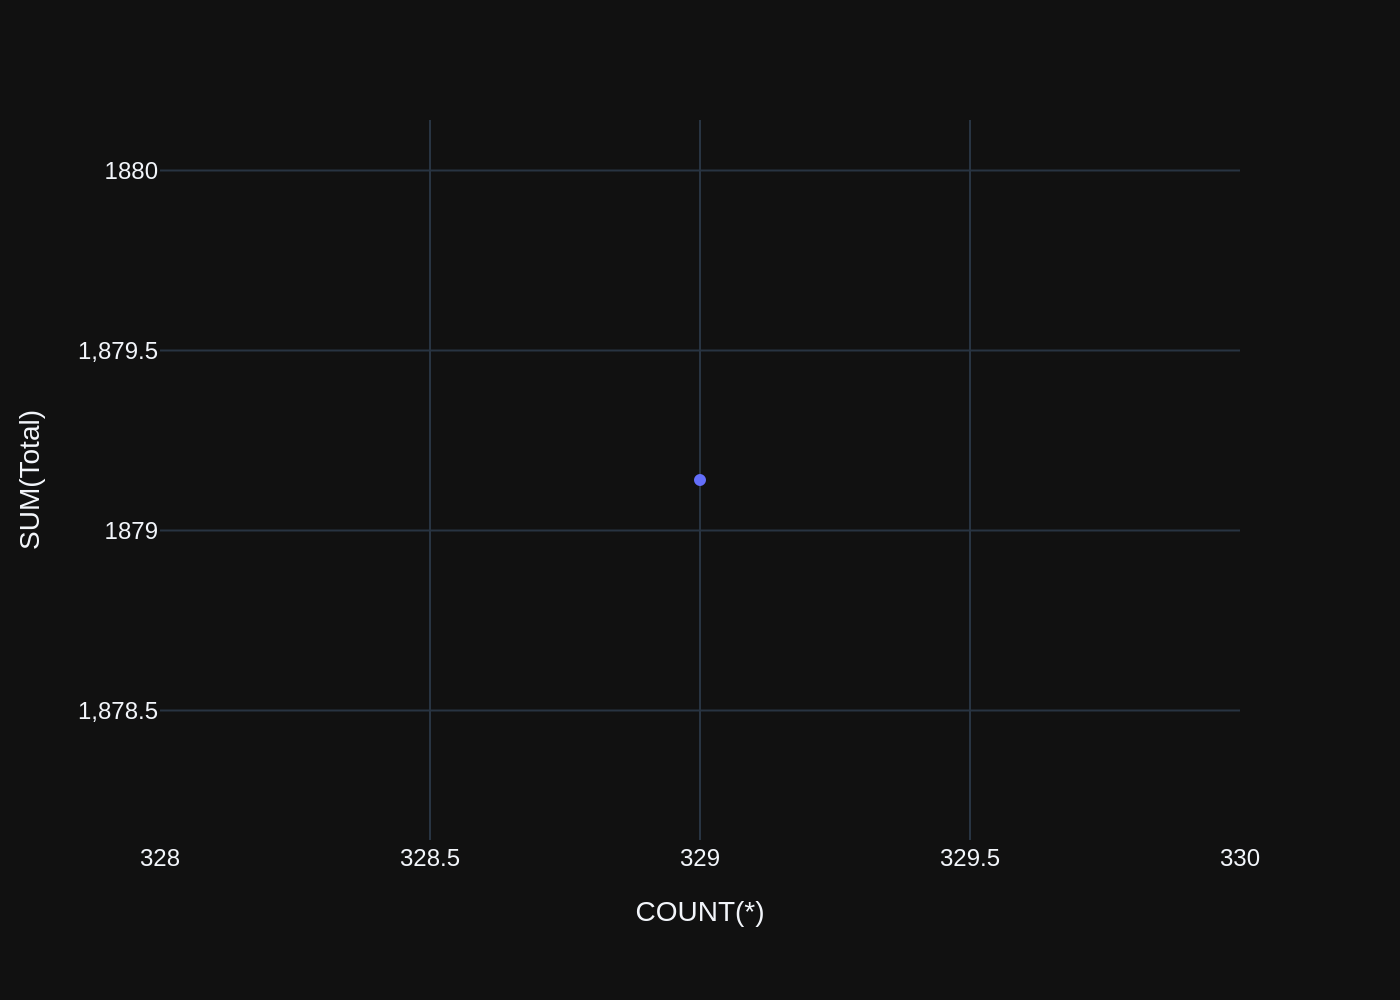





# QUESTION  - 12:  List all employees and their reporting manager's name (if any):



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT T1.FirstName , T1.LastName, T2.Title FROM employees AS T1 INNER JOIN employees AS T2 ON T1.ReportsTo = T2.EmployeeId WHERE T2.Title != 'Sales Support Agent' LIMIT 20


[( <DataFrame> )]
queried dataframe



,FirstName,LastName,Title
0,Nancy,Edwards,General Manager
1,Jane,Peacock,Sales Manager
2,Margaret,Park,Sales Manager
3,Steve,Johnson,Sales Manager
4,Michael,Mitchell,General Manager
5,Robert,King,IT Manager
6,Laura,Callahan,IT Manager



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if len(df) > 1:
    fig = px.bar(df, x='FirstName', y='LastName', color='Title', title='Employees and their Reporting Manager\'s Name')
else:
    fig = px.indicator(
        mode="number",
        value=1,
        title={'text': "Single Employee's Reporting Manager's Name"}
    )
    fig.add_annotation(text=f"{df['FirstName'].values[0]} {df['LastName'].values[0]} reports to a Sales Support Agent", x=0.5, y=0.5, showarrow=False)

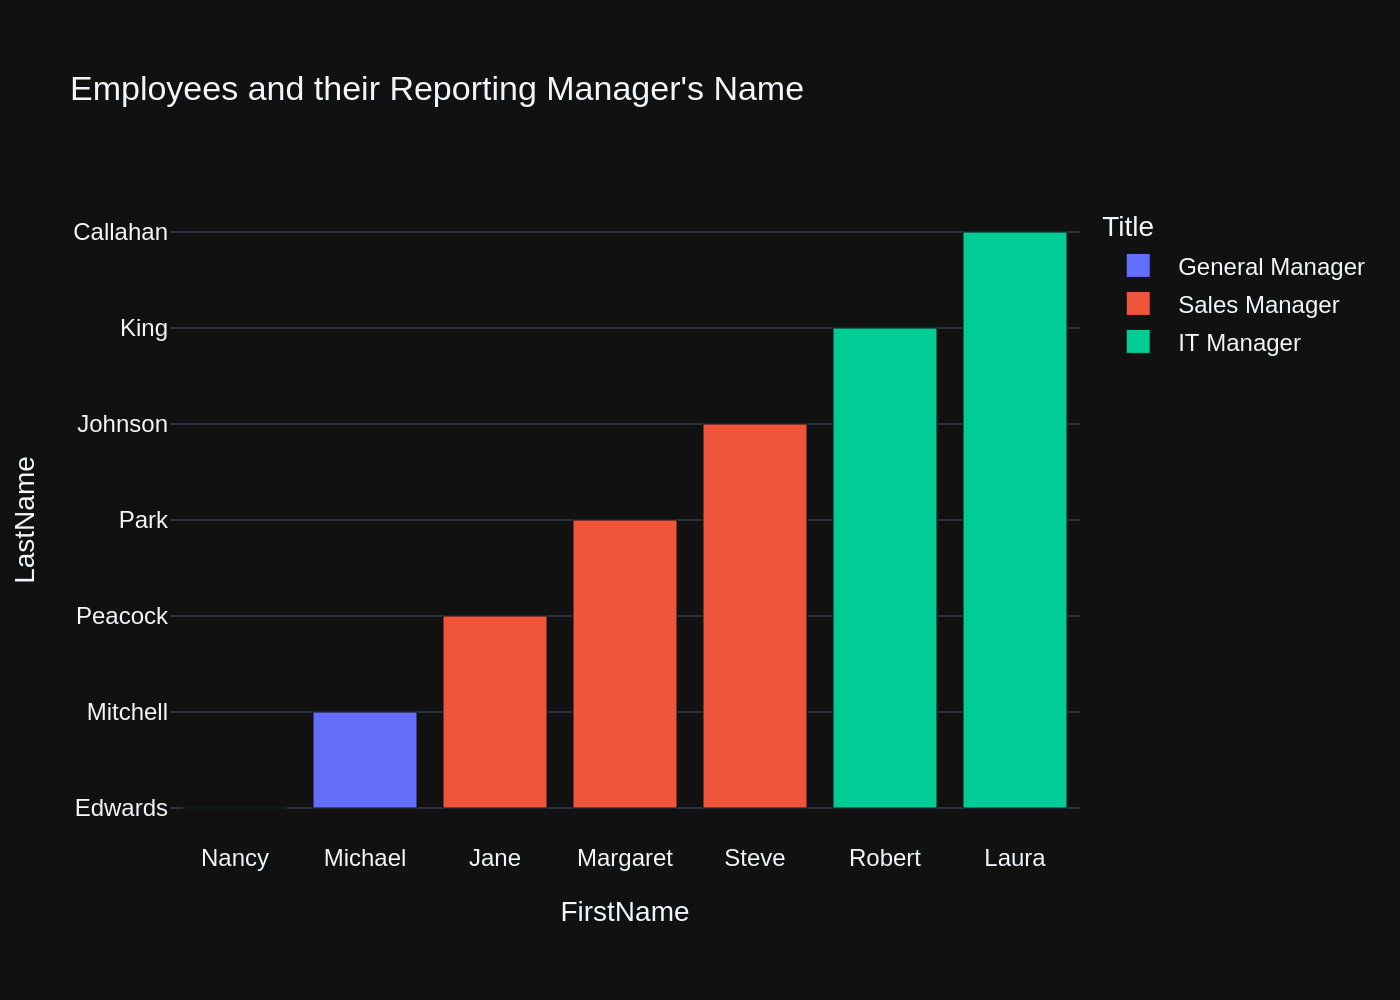





# QUESTION  - 13:   Get the average invoice total for each customer:



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT CustomerId, AVG(Total) FROM invoices GROUP BY CustomerId LIMIT 20


[( <DataFrame> )]
queried dataframe



,CustomerId,AVG(Total)
0,1,5.660000
1,2,5.374286
2,3,5.660000
3,4,5.660000
4,5,5.802857
5,6,7.088571
6,7,6.088571
7,8,5.374286
8,9,5.374286
9,10,5.374286



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if len(df) > 1:
    fig = px.bar(df, x='CustomerId', y='AVG(Total)', title='Average Invoice Total per Customer')
else:
    fig = px.indicator(
        mode="number+delta",
        value=df['AVG(Total)'].iloc[0],
        delta={'reference': df['AVG(Total)'].iloc[0]},
        title={'text': "Average Invoice Total", 'font': {'size': 24}}
    )

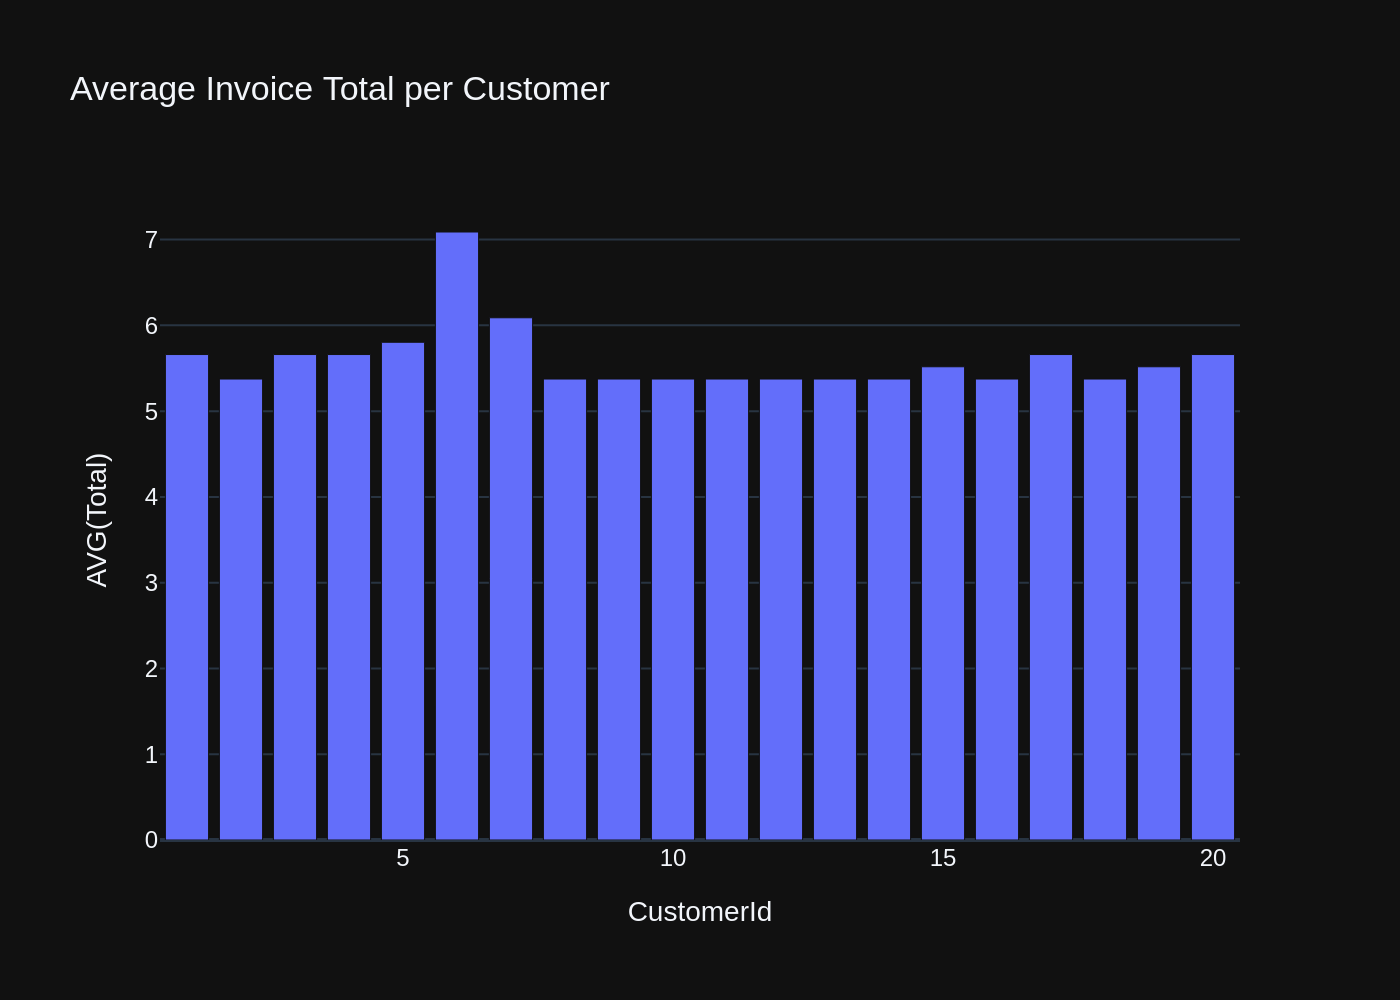





# QUESTION  - 14:  Find the top 5 most expensive tracks (based on unit price):



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT Name, UnitPrice FROM tracks ORDER BY UnitPrice DESC LIMIT 5


[( <DataFrame> )]
queried dataframe



,Name,UnitPrice
0,Battlestar Galactica: The Story So Far,1.99
1,Occupation / Precipice,1.99
2,"Exodus, Pt. 1",1.99
3,"Exodus, Pt. 2",1.99
4,Collaborators,1.99



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

# Check if the DataFrame has more than one entry
if len(df) > 1:
    fig = px.bar(df, x='Name', y='UnitPrice', title='Top 5 Most Expensive Tracks')
else:
    fig = px.indicator(
        mode="number",
        value=df['UnitPrice'].values[0],
        title={'text': "Most Expensive Track", 'font': {'size': 24}},
        number={'valueformat': ".2f"}
    )

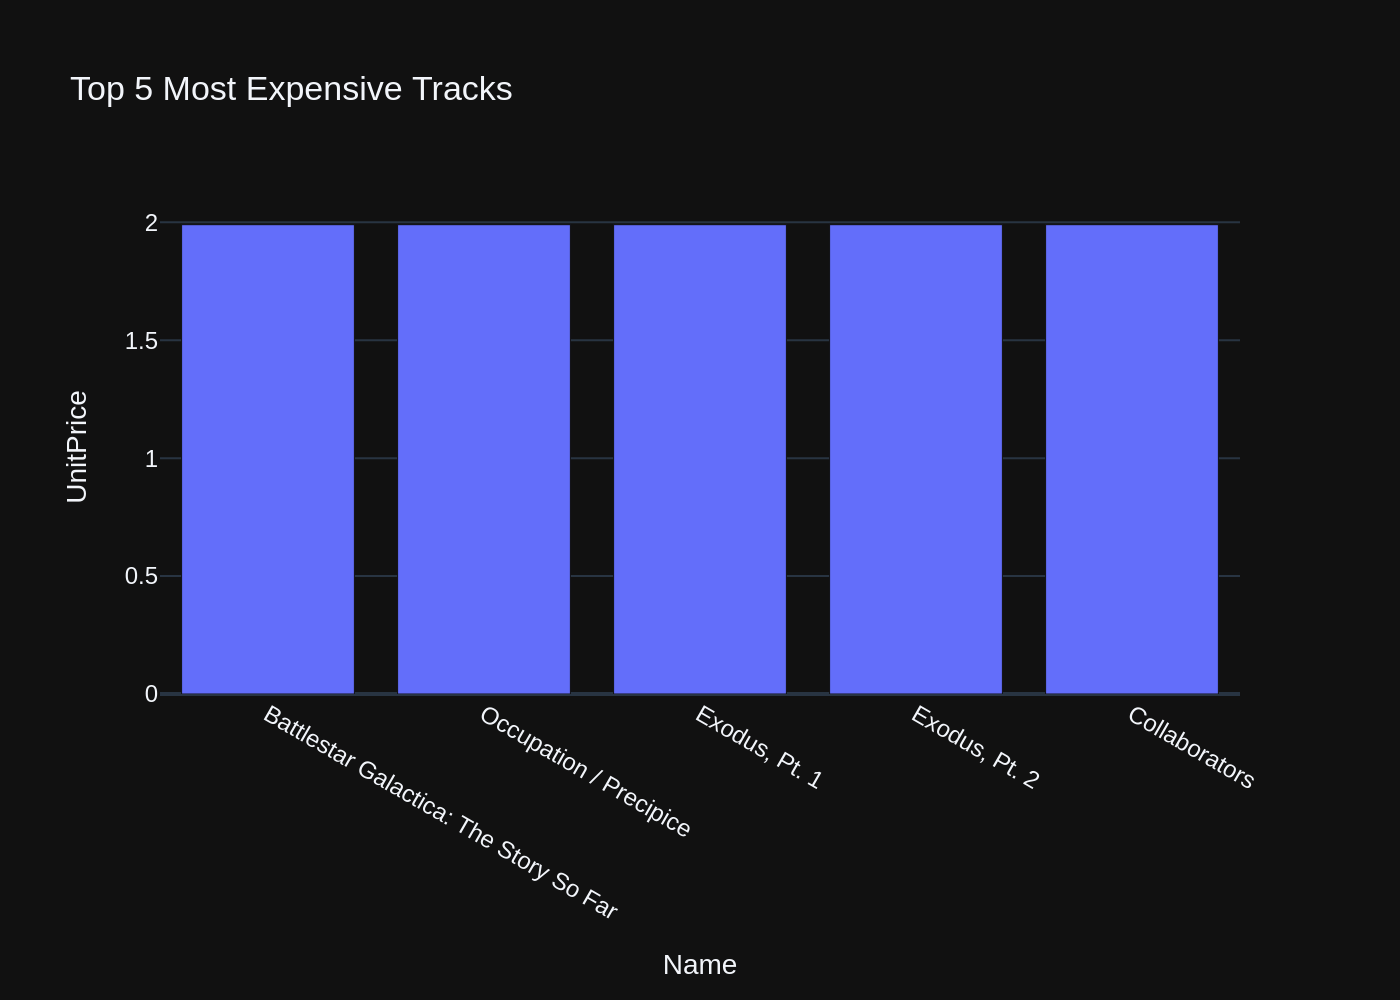





# QUESTION  - 15:  List all genres and the number of tracks in each genre:



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT G.Name , COUNT(T.TrackId) FROM genres AS G INNER JOIN tracks AS T ON G.GenreId = T.GenreId GROUP BY G.Name ORDER BY COUNT(T.TrackId) DESC LIMIT 20;


[( <SQL> )]
generated SQL statement



SELECT G.Name , COUNT(T.TrackId) FROM genres AS G INNER JOIN tracks AS T ON G.GenreId = T.GenreId GROUP BY G.Name ORDER BY COUNT(T.TrackId) DESC LIMIT 20;


[( <DataFrame> )]
queried dataframe



,Name,COUNT(T.TrackId)
0,Rock,1297
1,Latin,579
2,Metal,374
3,Alternative & Punk,332
4,Jazz,130
5,TV Shows,93
6,Blues,81
7,Classical,74
8,Drama,64
9,R&B/Soul,61



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

# Check if there is only one genre
if len(df) == 1:
    fig = go.Figure(go.Indicator(
        mode="number",
        value=df.iloc[0]['COUNT(T.TrackId)'],
        title={'text': f"Number of Tracks in the Genre: {df.iloc[0]['Name']}"}
    ))
else:
    fig = go.Figure(data=[
        go.Bar(
            x=df['Name'],
            y=df['COUNT(T.TrackId)'],
            text=df['COUNT(T.TrackId)'],
            textposition='auto',
            marker=dict(color='rgb(158,202,225)'),
            insidetextorientation='horizontal'
        )
    ])

fig.update_layout(
    title='Number of Tracks per Genre',
    xaxis_title='Genre',
    yaxis_title='Number of Tracks',
    template='plotly_dark'
)

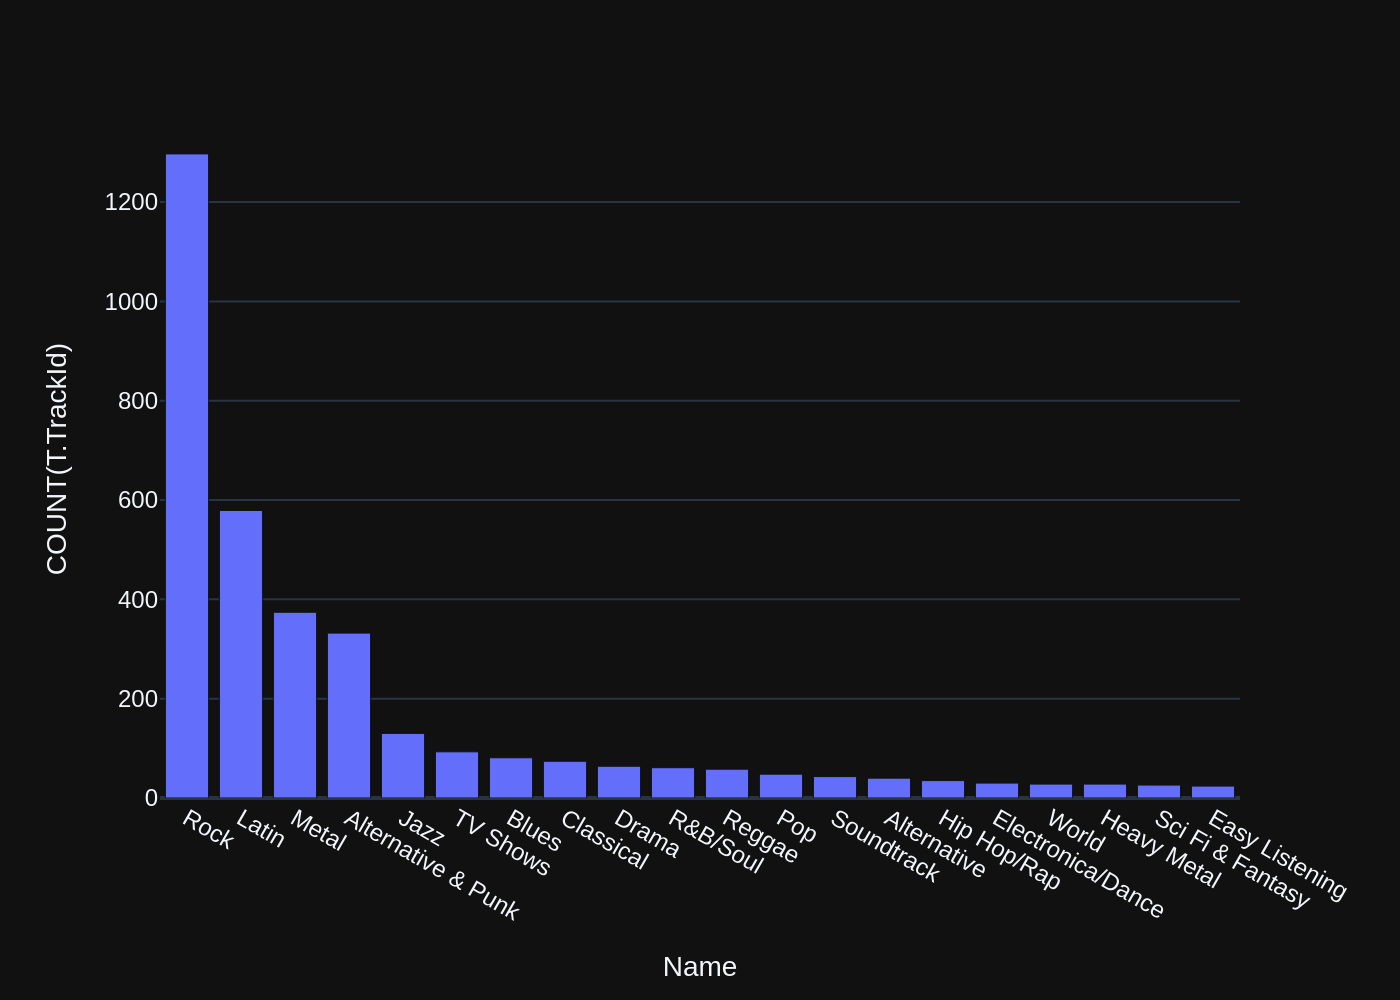





# QUESTION  - 16:  Get all genres that do not have any tracks associated with them:



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT Name FROM genres WHERE GenreId NOT IN ( SELECT GenreId FROM tracks ) LIMIT 20;


[( <SQL> )]
generated SQL statement



SELECT Name FROM genres WHERE GenreId NOT IN ( SELECT GenreId FROM tracks ) LIMIT 20;


[( <DataFrame> )]
queried dataframe



,Name



[( RETRY )]
***** 1 *****


Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT Name FROM genres WHERE GenreId NOT IN ( SELECT DISTINCT GenreId FROM tracks ) LIMIT 20


[( <DataFrame> )]
queried dataframe



,Name



[( RETRY )]
***** 2 *****


Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT Name FROM genres WHERE GenreId NOT IN (SELECT GenreId FROM tracks) LIMIT 20;


[( <SQL> )]
generated SQL statement



SELECT Name FROM genres WHERE GenreId NOT IN (SELECT GenreId FROM tracks) LIMIT 20;


[( <DataFrame> )]
queried dataframe



,Name



[( RETRY )]
***** 3 *****


Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT Name FROM genres WHERE GenreId NOT IN (SELECT GenreId FROM tracks)



[( <SQL> )]
generated SQL statement



SELECT Name FROM genres WHERE GenreId NOT IN (SELECT GenreId FROM tracks)


[( <DataFrame> )]
queried dataframe



,Name






# QUESTION  - 17:  List all customers who have not placed any orders:



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT * FROM customers WHERE CustomerId NOT IN ( SELECT CustomerId FROM invoices ) LIMIT 20


[( <DataFrame> )]
queried dataframe



,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId



[( RETRY )]
***** 1 *****


Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT FirstName, LastName FROM customers WHERE CustomerId NOT IN ( SELECT CustomerId FROM invoices ) LIMIT 20;


[( <SQL> )]
generated SQL statement



SELECT FirstName, LastName FROM customers WHERE CustomerId NOT IN ( SELECT CustomerId FROM invoices ) LIMIT 20;


[( <DataFrame> )]
queried dataframe



,FirstName,LastName



[( RETRY )]
***** 2 *****


Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT FirstName, LastName FROM customers WHERE CustomerId NOT IN ( SELECT CustomerId FROM invoices ) LIMIT 20;


[( <SQL> )]
generated SQL statement



SELECT FirstName, LastName FROM customers WHERE CustomerId NOT IN ( SELECT CustomerId FROM invoices ) LIMIT 20;


[( <DataFrame> )]
queried dataframe



,FirstName,LastName



[( RETRY )]
***** 3 *****


Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT * FROM customers WHERE CustomerId NOT IN ( SELECT DISTINCT CustomerId FROM invoices ) LIMIT 20;


[( <SQL> )]
generated SQL statement



SELECT * FROM customers WHERE CustomerId NOT IN ( SELECT DISTINCT CustomerId FROM invoices ) LIMIT 20;


[( <DataFrame> )]
queried dataframe



,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId






# QUESTION  - 18:   
        Can you find the top 10 most popular artists based on the number of tracks?
        Hint: There are 3 tables - artists, albums and tracks, 
        where albums and artists are linked by ArtistId, albums and tracks are linked by AlbumId,
    



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT T3.Name , COUNT(T1.TrackId) FROM tracks AS T1 INNER JOIN albums AS T2 ON T1.AlbumId = T2.AlbumId INNER JOIN artists AS T3 ON T2.ArtistId = T3.ArtistId GROUP BY T3.Name ORDER BY COUNT(T1.TrackId) DESC LIMIT 10;


[( <SQL> )]
generated SQL statement



SELECT T3.Name , COUNT(T1.TrackId) FROM tracks AS T1 INNER JOIN albums AS T2 ON T1.AlbumId = T2.AlbumId INNER JOIN artists AS T3 ON T2.ArtistId = T3.ArtistId GROUP BY T3.Name ORDER BY COUNT(T1.TrackId) DESC LIMIT 10;


[( <DataFrame> )]
queried dataframe



,Name,COUNT(T1.TrackId)
0,Iron Maiden,213
1,U2,135
2,Led Zeppelin,114
3,Metallica,112
4,Lost,92
5,Deep Purple,92
6,Pearl Jam,67
7,Lenny Kravitz,57
8,Various Artists,56
9,The Office,53



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if len(df) == 1:
    fig = px.indicator(
        mode="number",
        title='Top Artist by Number of Tracks',
        value=df.iloc[0]['COUNT(T1.TrackId)'],
        number={'prefix': df.iloc[0]['Name'] + ": "},
    )
else:
    fig = px.bar(df, x='Name', y='COUNT(T1.TrackId)', 
                 labels={'COUNT(T1.TrackId)': 'Number of Tracks'},
                 title='Top 10 Most Popular Artists Based on Number of Tracks')

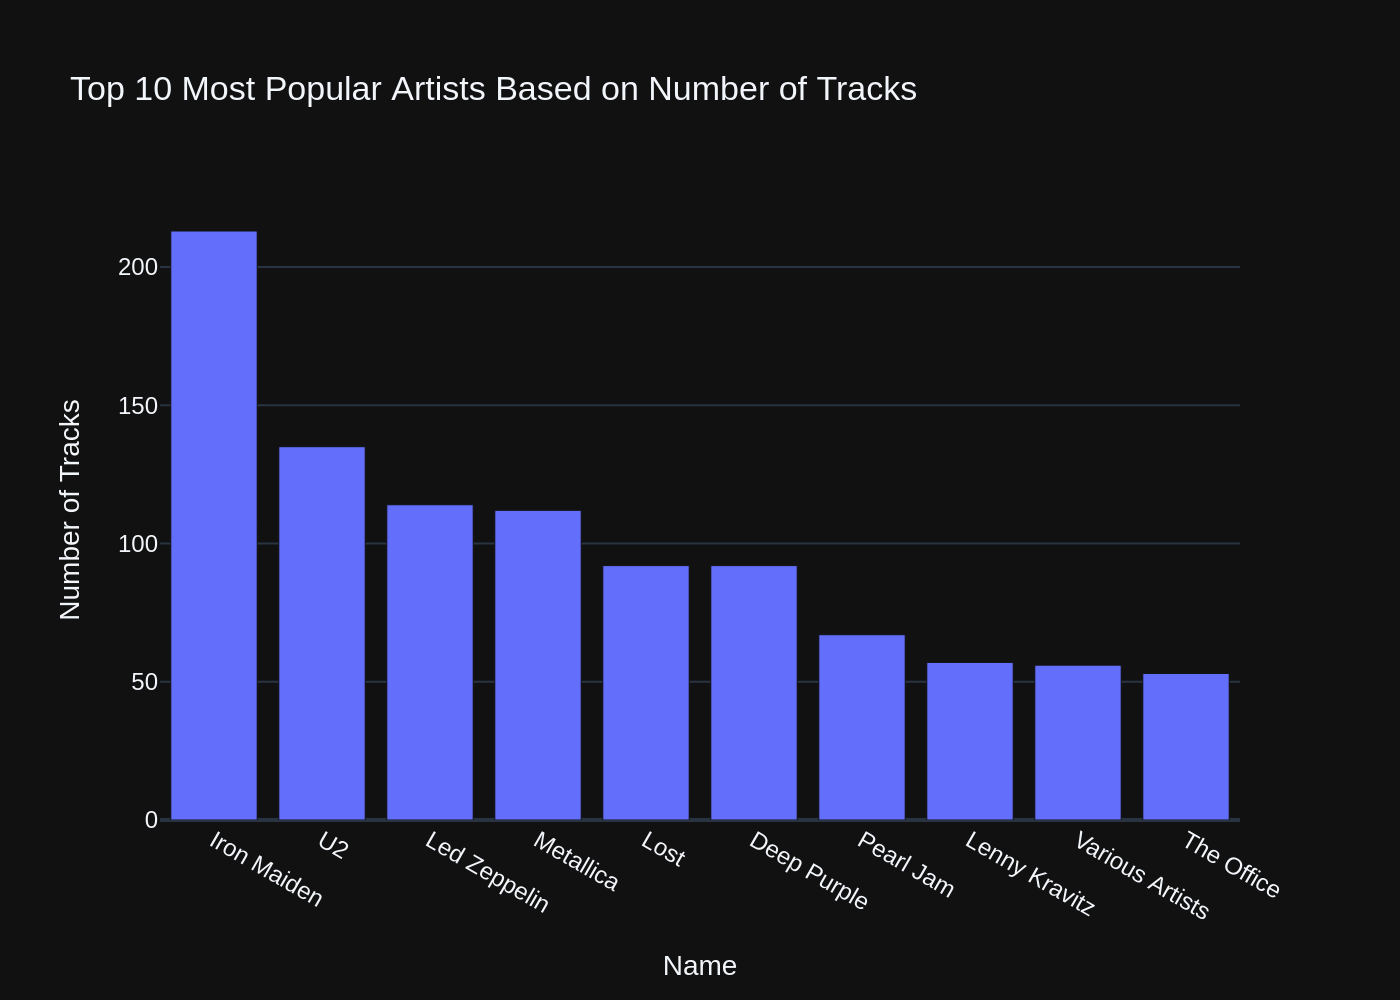





# QUESTION  - 19:  List all customers from Canada and their email addresses:



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT FirstName , LastName , Email FROM customers WHERE Country = 'Canada' LIMIT 20


[( <DataFrame> )]
queried dataframe



,FirstName,LastName,Email
0,François,Tremblay,ftremblay@gmail.com
1,Mark,Philips,mphilips12@shaw.ca
2,Jennifer,Peterson,jenniferp@rogers.ca
3,Robert,Brown,robbrown@shaw.ca
4,Edward,Francis,edfrancis@yachoo.ca
5,Martha,Silk,marthasilk@gmail.com
6,Aaron,Mitchell,aaronmitchell@yahoo.ca
7,Ellie,Sullivan,ellie.sullivan@shaw.ca



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objs as go

if len(df) == 1:
    indicator = go.Indicator(
        mode="number+delta",
        value=len(df),
        number={"prefix": "Number of Customers: ", 'valueformat': '.0f'},
        title={'text': "<span style='font-size:0.9em'>Canada Customers</span><br><span style='font-size:0.7em'></span>",
               'xanchor':'left'}
    )
    layout = go.Layout(height=300, template="plotly_white", margin=dict(b=2,t=45,l=10,r=10))
    fig = go.Figure(data=[indicator], layout=layout)
else:
    trace = go.Bar(
        x=df['Email'],
        y=df.apply(lambda row: f"{row['FirstName']} {row['LastName']}", axis=1),
        orientation='h',
        marker=dict(color='rgb(55, 83, 109)'),
        hoverinfo='x+y'
    )
    layout = go.Layout(
        title='Customers from Canada and their email addresses',
        xaxis_title='Email Address',
        yaxis_title='Customer Name',
        height=400,
        template="plotly_white",
        margin=dict(b=2,t=45,l=10,r=10)
    )
    fig = go.Figure(data=[trace], layout=layout)

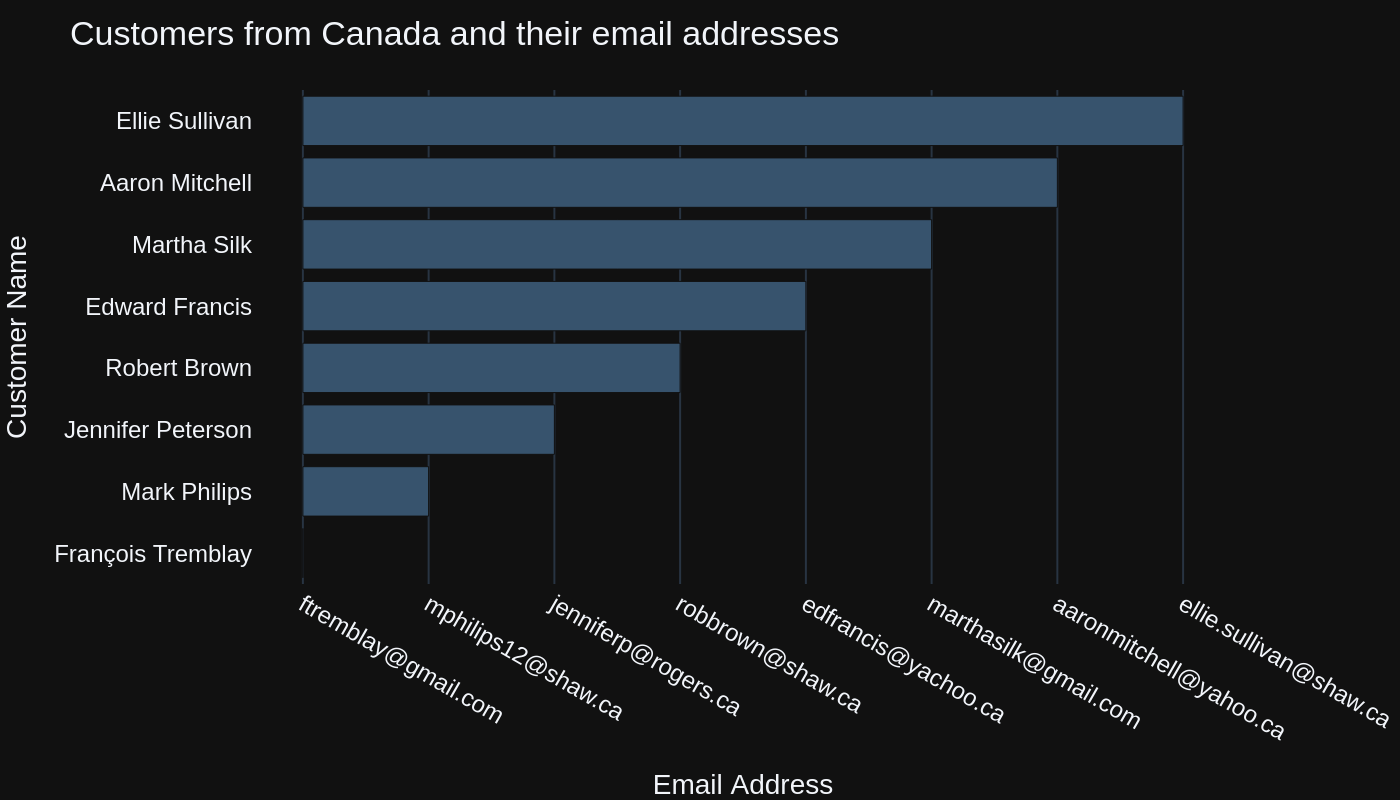





# QUESTION  - 20:  Find the customer with the most invoices 



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT CustomerId, COUNT(*) AS InvoiceCount 
FROM invoices 
GROUP BY CustomerId 
ORDER BY InvoiceCount DESC 
LIMIT 1;


[( <SQL> )]
generated SQL statement



SELECT CustomerId, COUNT(*) AS InvoiceCount 
FROM invoices 
GROUP BY CustomerId 
ORDER BY InvoiceCount DESC 
LIMIT 1;


[( <DataFrame> )]
queried dataframe



,CustomerId,InvoiceCount
0,1,7



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

# Check if the DataFrame has only one row
if len(df) == 1:
    fig = go.Figure(go.Indicator(
        mode="number+delta",
        value=df['InvoiceCount'].iloc[0],
        title={"text": f"Customer {df['CustomerId'].iloc[0]} with Most Invoices"},
        delta={'reference': df['InvoiceCount'].iloc[0], 'position': "top"}
    ))
else:
    fig = go.Figure(data=[go.Bar(
        x=df['CustomerId'],
        y=df['InvoiceCount']
    )])
    fig.update_layout(title='Customers with Most Invoices')

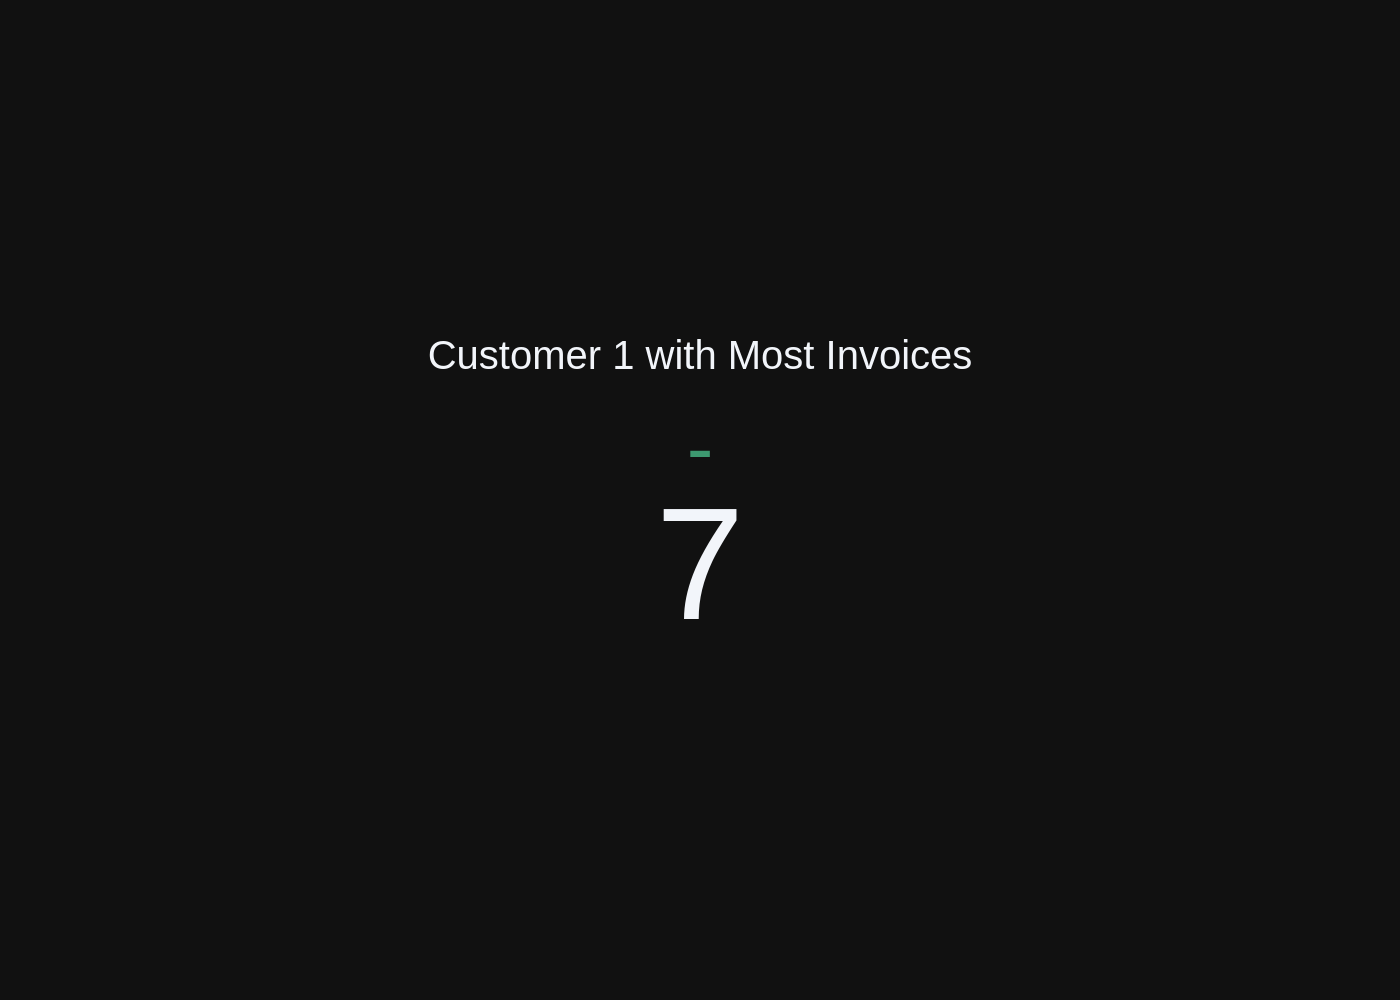





# QUESTION  - 21:  Find the customer who bought the most albums in total quantity (across all invoices):



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT CustomerId, SUM(Quantity) FROM invoice_items INNER JOIN invoices ON invoice_items.InvoiceId = invoices.InvoiceId GROUP BY CustomerId ORDER BY SUM(Quantity) DESC LIMIT 1;


[( <SQL> )]
generated SQL statement



SELECT CustomerId, SUM(Quantity) FROM invoice_items INNER JOIN invoices ON invoice_items.InvoiceId = invoices.InvoiceId GROUP BY CustomerId ORDER BY SUM(Quantity) DESC LIMIT 1;


[( <DataFrame> )]
queried dataframe



,CustomerId,SUM(Quantity)
0,1,38



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

if len(df) == 1:
    fig = go.Figure(go.Indicator(
        mode="number",
        value=df.iloc[0]['SUM(Quantity)'],
        title={"text": "Total Albums Bought by Customer<br><span style='font-size:0.8em'>Highest Quantity</span>"},
        number={'valueformat': ',.0f'}
    ))
else:
    fig = go.Figure(go.Bar(
        x=df['CustomerId'],
        y=df['SUM(Quantity)'],
        text=df['SUM(Quantity)'].astype(str),
        textposition='auto',
        marker_color='rgb(158,202,225)',
        insidetextanchor='middle'
    ))

fig.update_layout(
    title="Customer with Most Albums Bought",
    xaxis_title="Customer ID",
    yaxis_title="Total Quantity of Albums"
)

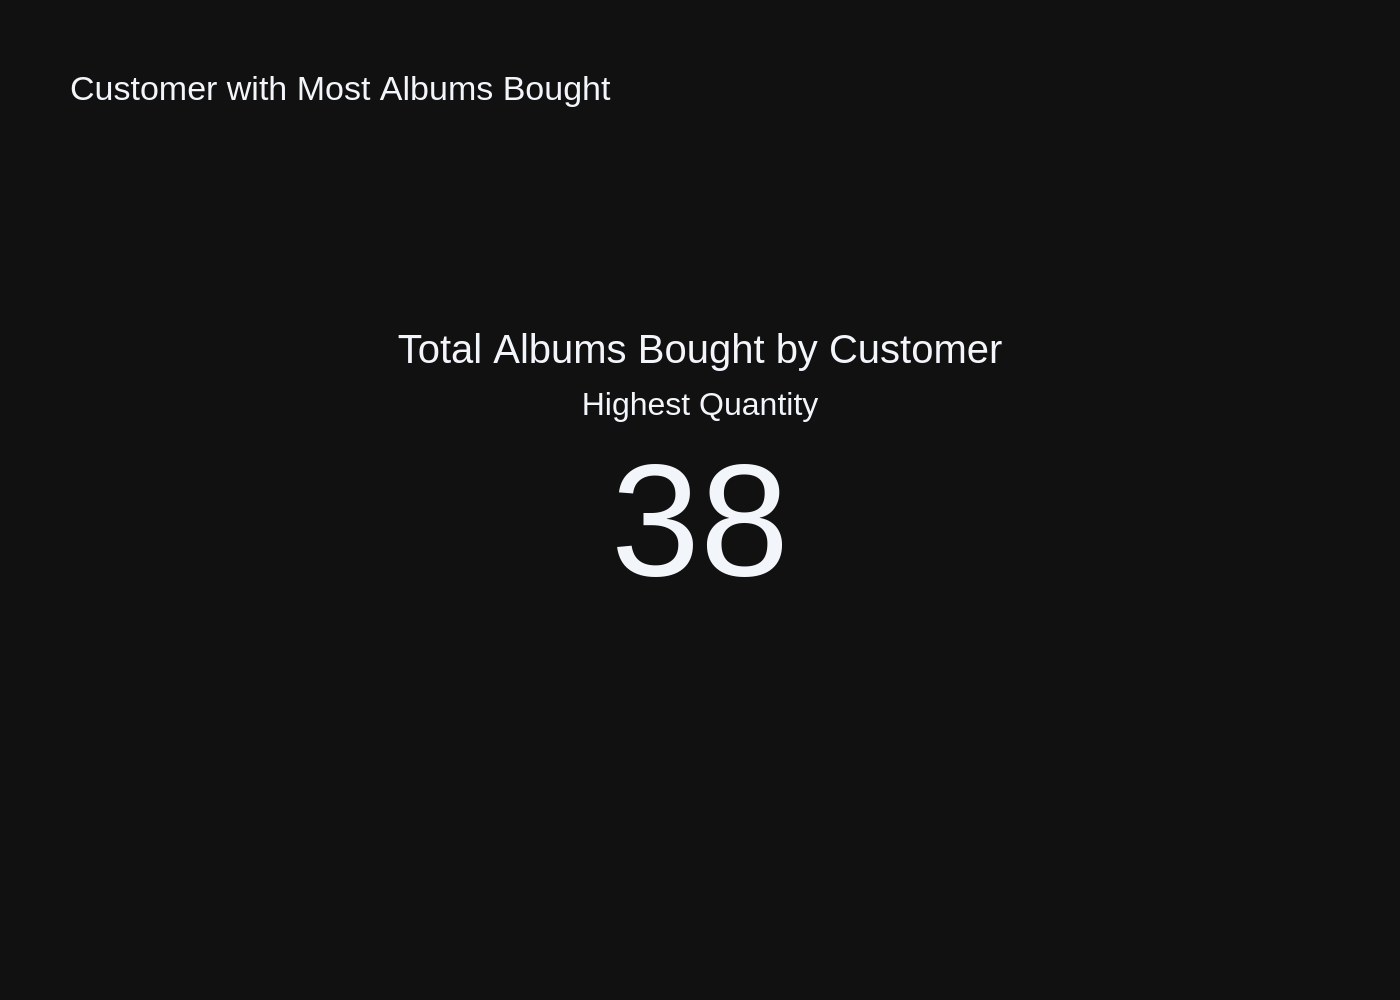





# QUESTION  - 22:        
        Find the top 5 customers who bought the most albums in total quantity (across all invoices):
        Hint: album quantity is found in invoice_items, 
    



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT CustomerId , SUM(Quantity) FROM invoice_items INNER JOIN invoices ON invoice_items.InvoiceId = invoices.InvoiceId GROUP BY CustomerId ORDER BY SUM(Quantity) DESC LIMIT 5;


[( <SQL> )]
generated SQL statement



SELECT CustomerId , SUM(Quantity) FROM invoice_items INNER JOIN invoices ON invoice_items.InvoiceId = invoices.InvoiceId GROUP BY CustomerId ORDER BY SUM(Quantity) DESC LIMIT 5;


[( <DataFrame> )]
queried dataframe



,CustomerId,SUM(Quantity)
0,1,38
1,2,38
2,3,38
3,4,38
4,5,38



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

# Check if the DataFrame has more than one row
if len(df) > 1:
    fig = px.bar(df, x='CustomerId', y='SUM(Quantity)', 
                 labels={'CustomerId': 'Customer ID', 'SUM(Quantity)': 'Total Albums Bought'},
                 title='Top 5 Customers by Total Album Quantity')
else:
    fig = px.indicator(
        mode="number",
        value=df['SUM(Quantity)'].iloc[0],
        title={'text': f"Customer {df['CustomerId'].iloc[0]}: Total Albums Bought"},
        number={'valueformat': ",.0f"}
    )

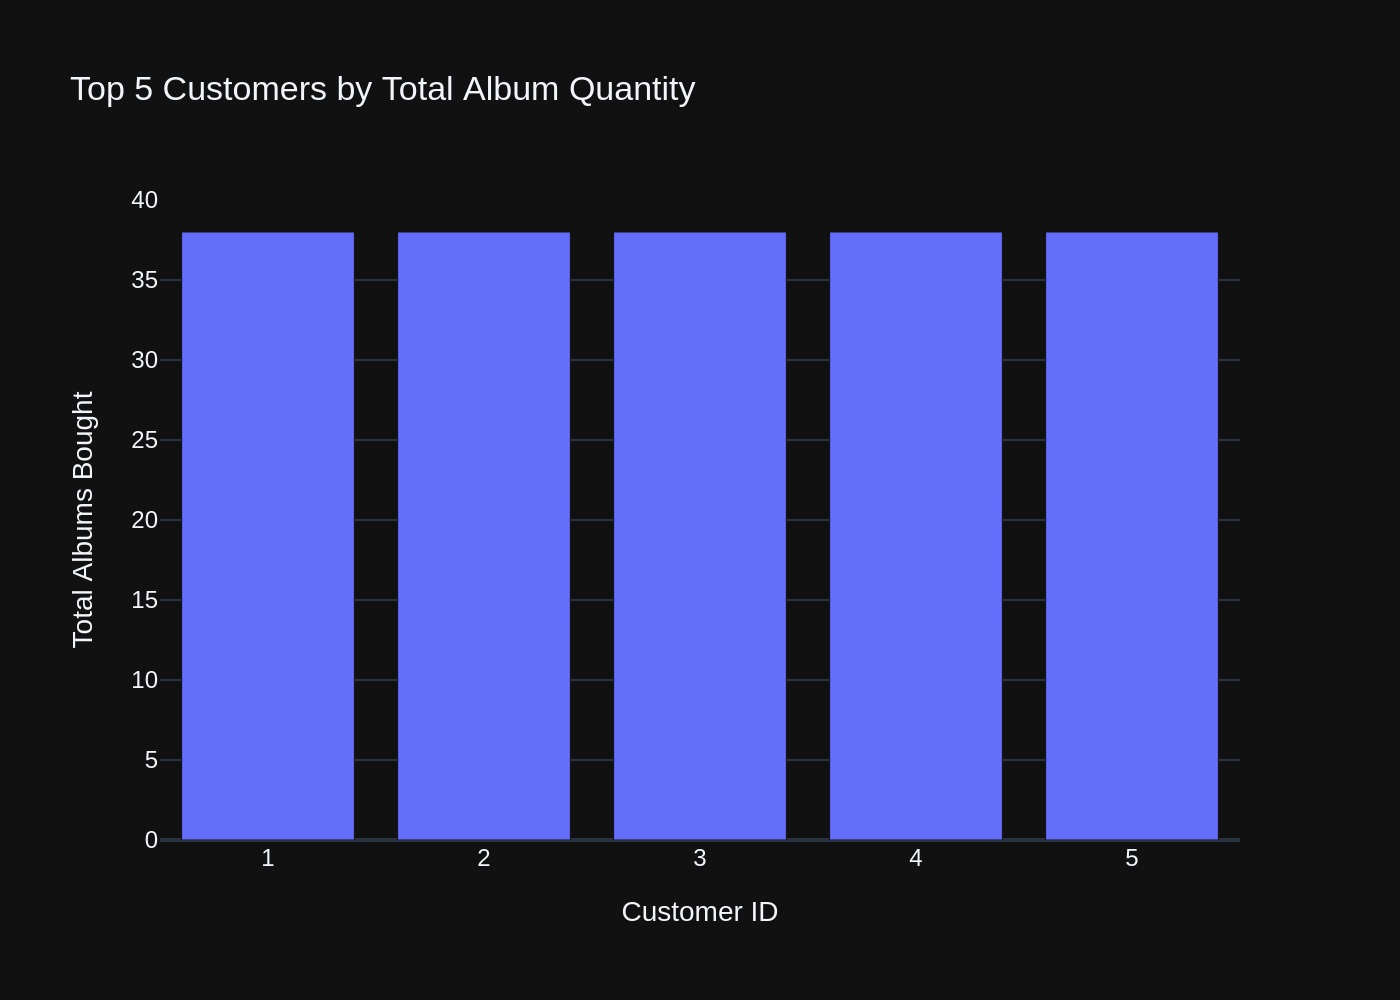





# QUESTION  - 23:    
         Find the top 5 customers who spent the most money overall,  
         Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary 
    



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT CustomerId , SUM(Total) FROM invoices GROUP BY CustomerId ORDER BY SUM(Total) DESC LIMIT 5;


[( <SQL> )]
generated SQL statement



SELECT CustomerId , SUM(Total) FROM invoices GROUP BY CustomerId ORDER BY SUM(Total) DESC LIMIT 5;


[( <DataFrame> )]
queried dataframe



,CustomerId,SUM(Total)
0,6,49.62
1,26,47.62
2,57,46.62
3,45,45.62
4,46,45.62



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if len(df) == 1:
    fig = px.indicator(
        mode="number",
        value=df['SUM(Total)'].values[0],
        title=f"Top Customer Spend: {df['CustomerId'].values[0]}"
    )
else:
    fig = px.bar(
        df,
        x='CustomerId',
        y='SUM(Total)',
        text='SUM(Total)',
        labels={'CustomerId': 'Customer ID', 'SUM(Total)': 'Total Spend'},
        title='Top 5 Customers by Total Spend'
    )

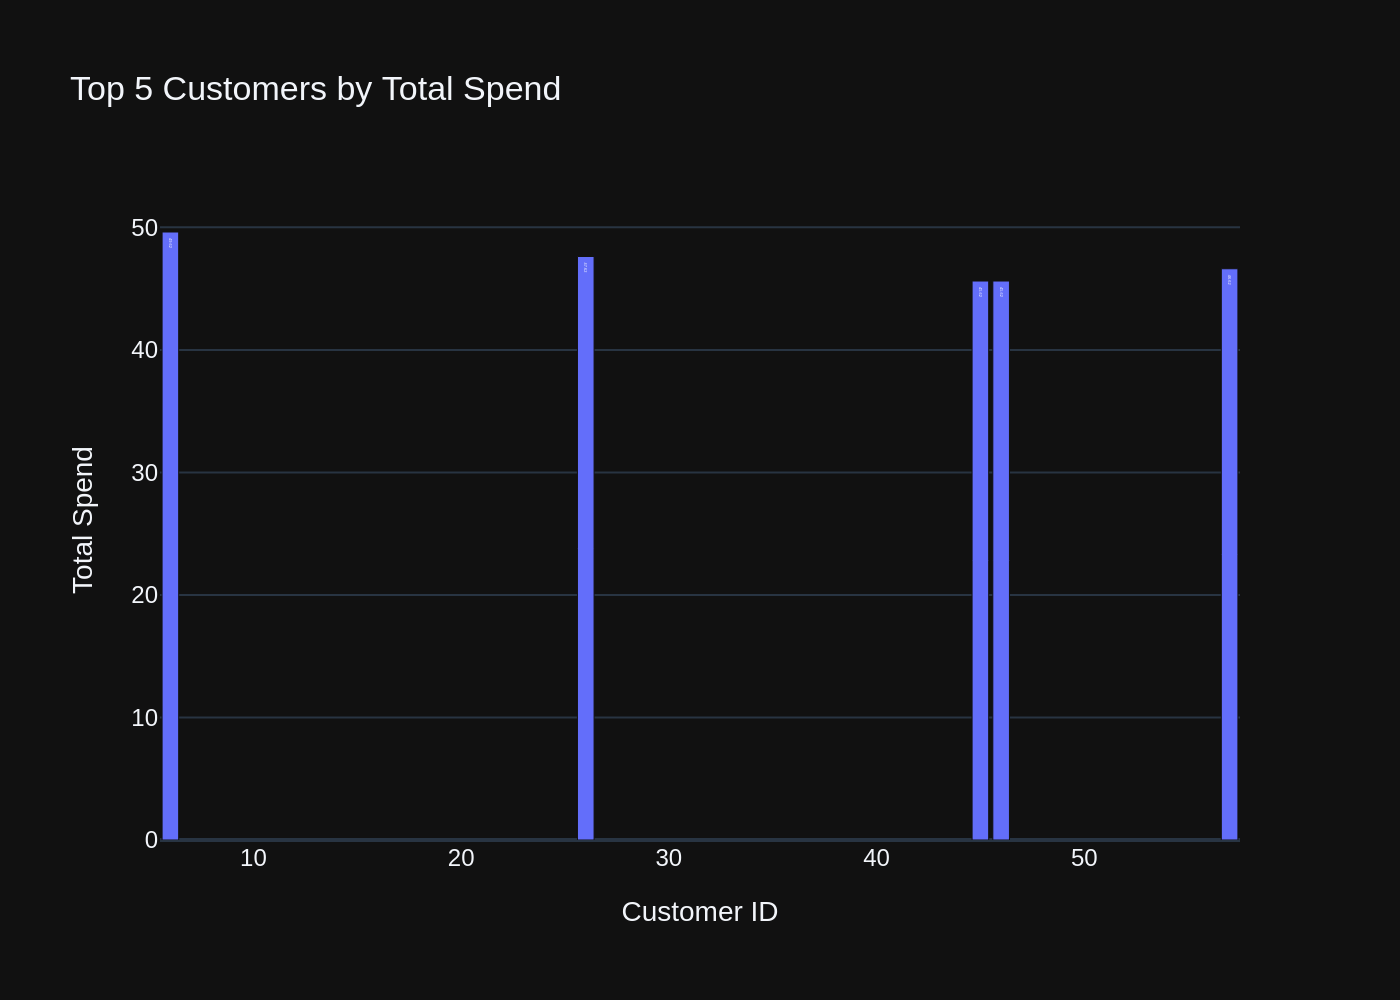





# QUESTION  - 24:  Get all playlists containing at least 10 tracks and the total duration of those tracks:



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT PlaylistId , SUM(Milliseconds) AS TotalDuration FROM playlist_track INNER JOIN tracks ON playlist_track.TrackId = tracks.TrackId GROUP BY PlaylistId HAVING COUNT(*) >= 10 LIMIT 20;


[( <SQL> )]
generated SQL statement



SELECT PlaylistId , SUM(Milliseconds) AS TotalDuration FROM playlist_track INNER JOIN tracks ON playlist_track.TrackId = tracks.TrackId GROUP BY PlaylistId HAVING COUNT(*) >= 10 LIMIT 20;


[( <DataFrame> )]
queried dataframe



,PlaylistId,TotalDuration
0,1,877683083
1,3,501094957
2,5,398705153
3,8,877683083
4,10,501094957
5,11,9486559
6,12,21770592
7,13,6755730
8,14,7575051
9,15,7439811



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

if len(df) > 1:
    fig = go.Figure(data=go.Bar(x=df['PlaylistId'], y=df['TotalDuration']))
else:
    fig = go.Figure(go.Indicator(
        mode="number",
        value=int(df['TotalDuration']),
        title={"text": f"Total Duration for Playlist {df['PlaylistId'][0]}"}
    ))

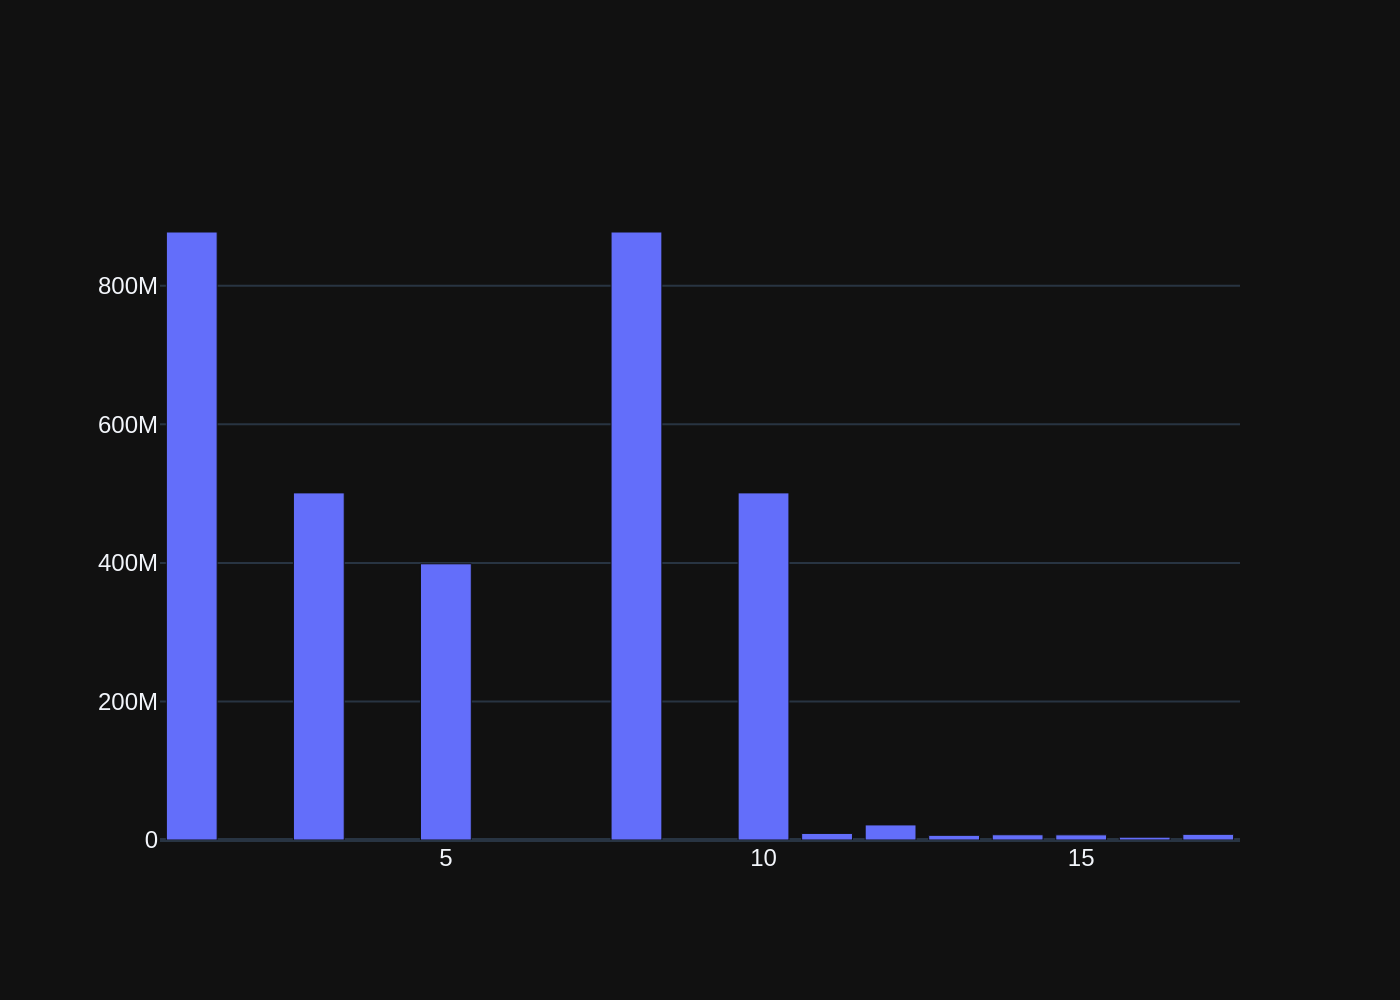





# QUESTION  - 25:  Identify artists who have albums with tracks appearing in multiple genres:



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT DISTINCT T3.Name FROM tracks AS T1 INNER JOIN albums AS T2 ON T1.AlbumId = T2.AlbumId INNER JOIN artists AS T3 ON T2.ArtistId = T3.ArtistId GROUP BY T1.AlbumId HAVING COUNT(DISTINCT T1.GenreId) > 1 LIMIT 20;


[( <SQL> )]
generated SQL statement



SELECT DISTINCT T3.Name FROM tracks AS T1 INNER JOIN albums AS T2 ON T1.AlbumId = T2.AlbumId INNER JOIN artists AS T3 ON T2.ArtistId = T3.ArtistId GROUP BY T1.AlbumId HAVING COUNT(DISTINCT T1.GenreId) > 1 LIMIT 20;


[( <DataFrame> )]
queried dataframe



,Name
0,Eric Clapton
1,Iron Maiden
2,Lenny Kravitz
3,Battlestar Galactica
4,Heroes
5,Lost
6,The Office



Ollama parameters:
model=qwen2.5-coder:14b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

if len(df) == 1:
    fig = go.Figure(go.Indicator(
        mode="text",
        value=df.iloc[0]['Name'],
        title={"text": "Artist with Albums in Multiple Genres"}
    ))
else:
    fig = go.Figure(data=[go.Bar(
        x=df['Name'],
        y=range(len(df)),
        orientation='h'
    )])
    fig.update_layout(title="Artists with Albums in Multiple Genres")

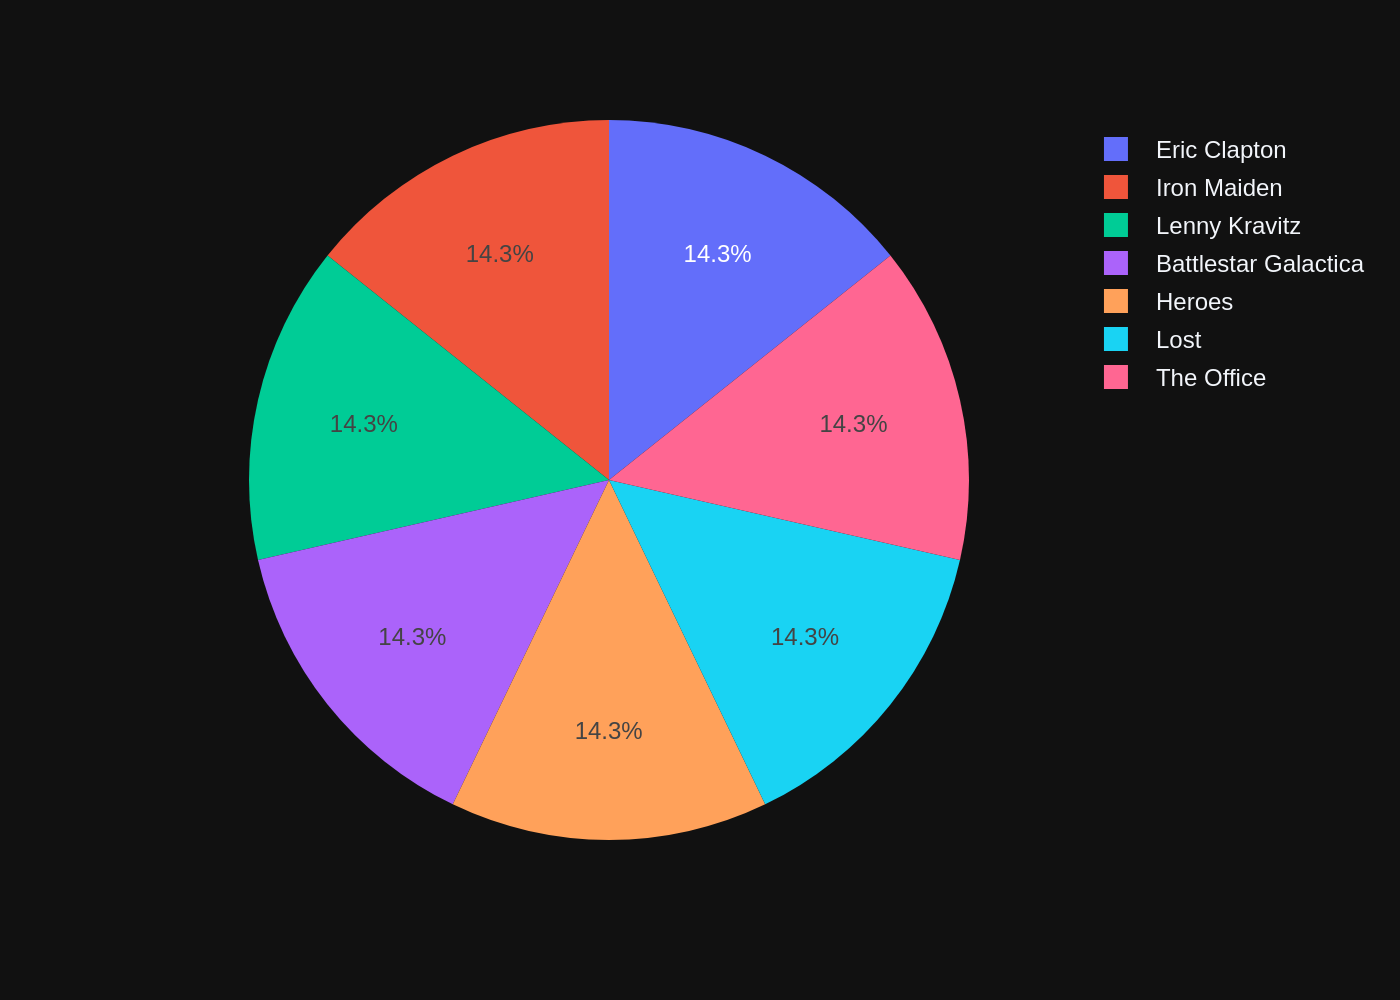

In [16]:
ts_start = time()
for n, question in enumerate(questions):
    # if n != 4: continue
    # if n > 5: continue

    resp = vn.ask_adaptive(question=question, tag_id=n+2)
    # vn.ask(question=question, allow_llm_to_see_data=allow_llm_to_see_data)
    # my_vn_ask(question=question, sql_id=n+2, allow_llm_to_see_data=allow_llm_to_see_data)

ts_stop = time()
elapsed_time = ts_stop - ts_start

### Check completion time

In [17]:
elapsed_time

649.8490896224976

In [18]:
str_elapsed_sec = f"{elapsed_time:.0f}"
ts = datetime.now().strftime("%Y%m%d-%H%M%S")
print(f"Completed testing:\n================\n LLM model '{model_name}' \n took {str_elapsed_sec} sec\n run on '{hostname}' \n at {ts}")

Completed testing:
 LLM model 'qwen2.5-coder:14b' 
 took 650 sec
 run on 'ducklover1' 
 at 20241123-005444


In [19]:
file_csv = f"training_data-{model_name}-{str_elapsed_sec}s-{hostname}-{ts}.csv"
file_csv

'training_data-qwen2.5-coder:14b-650s-ducklover1-20241123-005444.csv'

### Save training data

In [20]:
# show training data
df_training_data = vn.get_training_data()
df_training_data

,id,question,content,training_data_type
0,04505c33-7bf5-5004-a52c-0762a4ac7b30-sql,Identify artists who have albums with tracks a...,SELECT DISTINCT T3.Name FROM tracks AS T1 INNE...,sql
1,04a71f40-f42c-5490-b0c7-296458ed9e31-sql,Find all invoices since 2010 and the total amo...,"SELECT COUNT(*) , SUM(Total) FROM invoices WHE...",sql
2,14ce3678-41f3-5ee8-9b75-71cc5297121e-sql,Get the average invoice total for each customer:,"SELECT CustomerId, AVG(Total) FROM invoices GR...",sql
3,198be005-3d10-5b95-8e39-9a73ae76e6bc-sql,List all invoices with a total exceeding $10,SELECT * FROM invoices WHERE Total > 10 LIMIT 20,sql
4,217dc150-a5e3-585a-b4fb-75efada9a193-sql,Find the customer who bought the most albums i...,"SELECT CustomerId, SUM(Quantity) FROM invoice_...",sql
5,23da38f5-d168-5969-91b0-8ffc888a8a41-sql,\n Generating SQL for this ...,SELECT * FROM invoices LIMIT 20,sql
6,3359adcf-7e85-5ea8-8f38-821efae23710-sql,Get all playlists containing at least 10 track...,"SELECT PlaylistId , SUM(Milliseconds) AS Total...",sql
7,3573cc12-226d-594d-b18e-59b7a60974e9-sql,Find the top 5 most expensive tracks (based on...,"SELECT Name, UnitPrice FROM tracks ORDER BY Un...",sql
8,362e1e01-4245-58a1-a868-b3911770f4d4-sql,List all genres and the number of tracks in ea...,"SELECT G.Name , COUNT(T.TrackId) FROM genres A...",sql
9,40f40580-4b7b-55a3-9bca-5a7d0fd872b2-sql,"Find all tracks with a name containing ""What"" ...","SELECT Name FROM tracks WHERE Name LIKE ""%What...",sql


In [21]:
df_training_data.to_csv(file_csv, index=False)